******* TEST *******


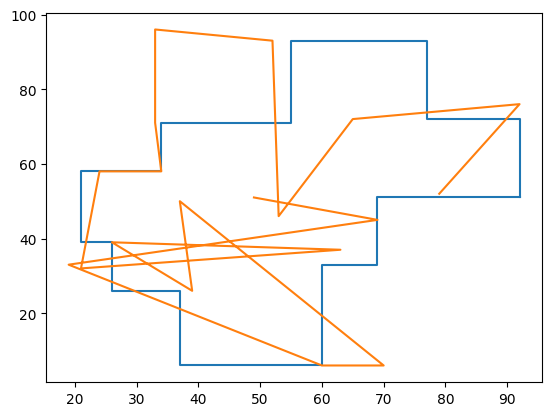

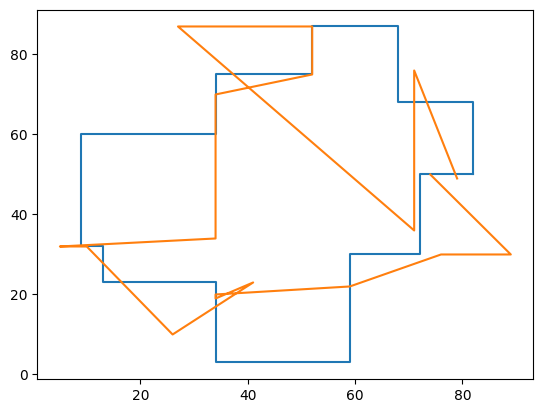

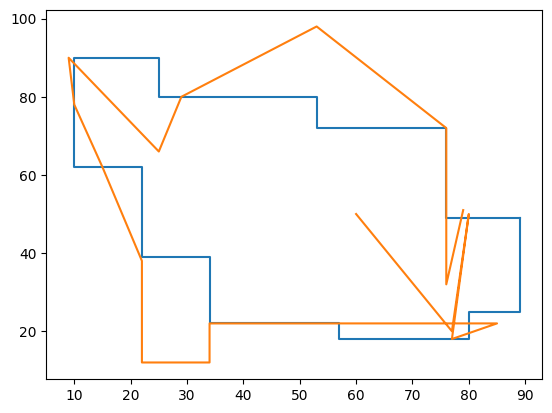

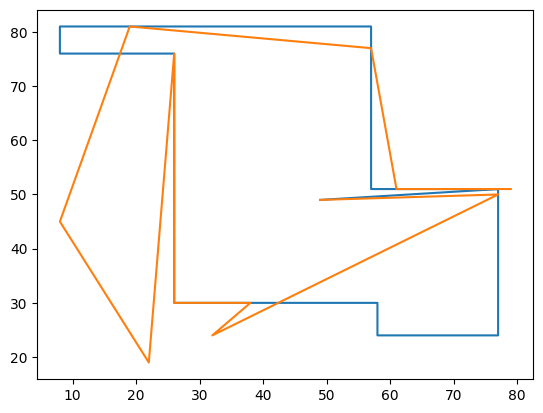

In [101]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):
  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

******* TEST *******


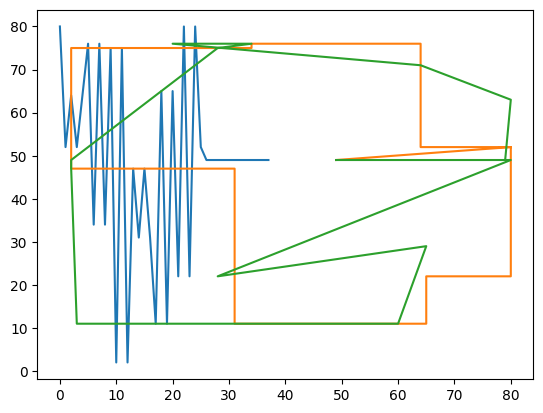

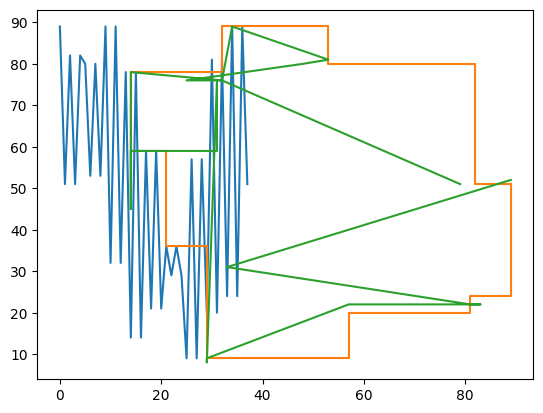

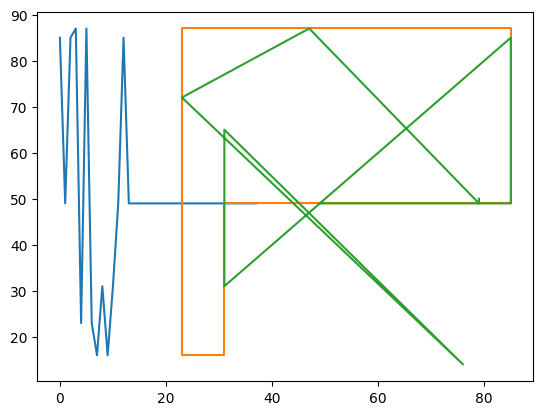

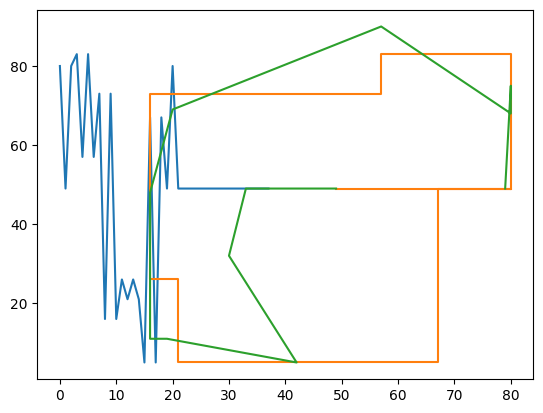

In [102]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):
  plt.plot(y[i].cpu().detach())
  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

In [103]:
p.shape

torch.Size([100, 38, 100])

In [104]:
p[0]

tensor([[-3.1326, -1.5315, -2.9364,  ...,  8.4233,  8.7169,  0.2259],
        [-5.0599, -3.4361, -4.3386,  ..., -3.3388, -2.4708, -1.5716],
        [-2.9984, -0.8794, -1.3852,  ..., -4.7021,  0.0318, -0.5335],
        ...,
        [-2.2782, -2.9412, -2.1686,  ..., -0.7214, -0.0839, -0.5707],
        [-2.2775, -2.9414, -2.1680,  ..., -0.7215, -0.0842, -0.5708],
        [-2.2773, -2.9416, -2.1679,  ..., -0.7215, -0.0842, -0.5709]],
       grad_fn=<SelectBackward0>)

In [105]:
p[0].argmax(1)

tensor([79, 49, 80, 63, 64, 71, 20, 76, 34, 76, 28, 75,  2, 49,  2, 47,  3, 11,
        60, 11, 65, 29, 28, 22, 80, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49])

In [106]:
p[0].argmax(1).shape

torch.Size([38])

******* TEST *******


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

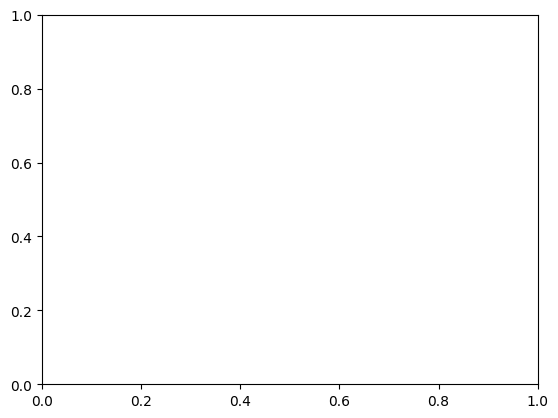

In [107]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach())
  plt.plot(p[i].detach().argmax(1))
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

In [ ]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach())
  plt.plot(p[i].detach().argmax(1))
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

: 

******* TEST *******


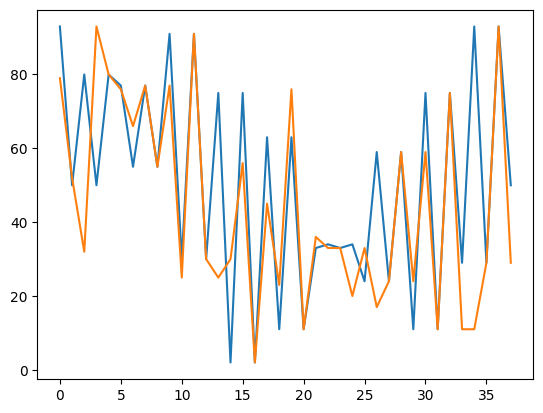

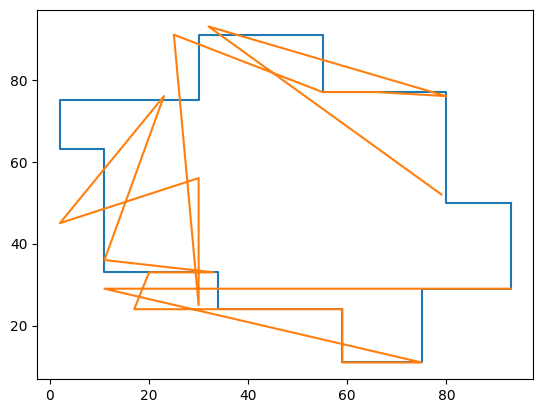

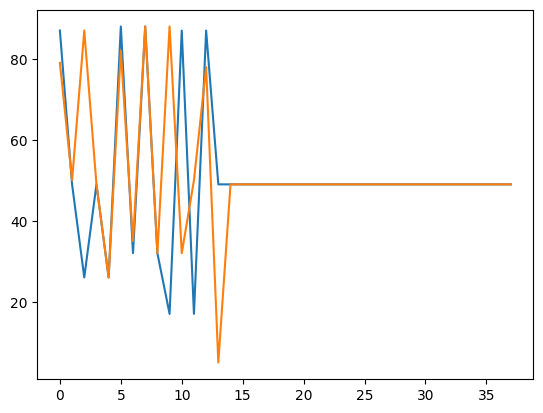

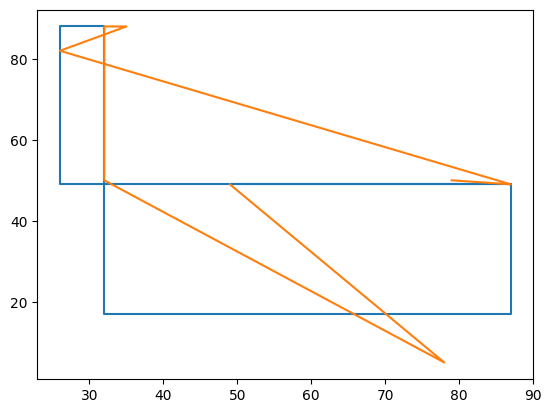

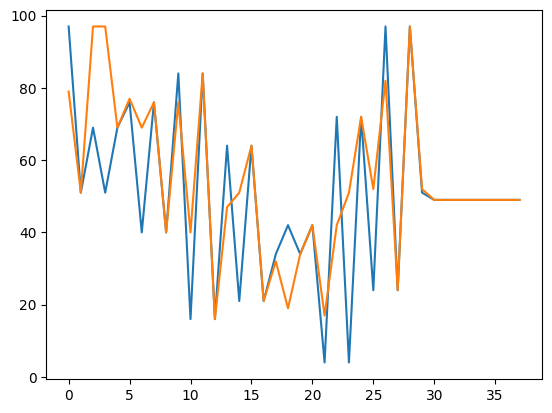

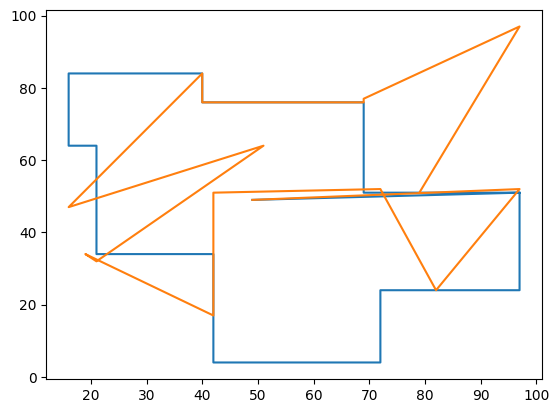

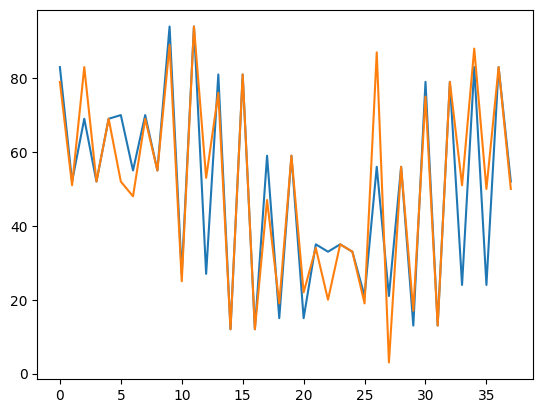

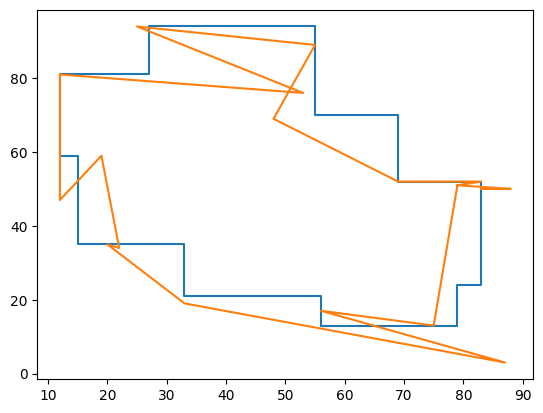

In [108]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach().cpu())
  plt.plot(p[i].detach().argmax(1).cpu())
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

In [109]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    # self.xemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    # self.yemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.emb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.blocks = nn.ModuleList([LatentAttentionBlock(residual_depth) for _ in range(num_blocks)])
    self.norm = nn.LayerNorm(residual_depth, bias=False)
    self.out = nn.Linear(residual_depth, n_toks, bias=False)
  
  def forward(self, x:torch.Tensor):
    # x = x.reshape(len(x), -1, 2)
    # x = torch.cat([self.xemb(x[:,:,0]).unsqueeze(2), self.yemb(x[:,:,1]).unsqueeze(2)], dim=2)
    # x = x.reshape(len(x), -1, residual_depth)
    # x = x.reshape(len(x), -1, residual_depth)
    x = self.emb(x)
    x = self.norm(x)
    for block in self.blocks: x = block(x)
    x = self.norm(x)
    x = self.out(x)
    return x

net = Model().to(device, dtype).train()
opt = optim.Adam(net.parameters(), lr=3e-4)

In [110]:
def random_shape():
  n = np.random.randint(3, 10)
  corners = []
  for i in range(n):
    angle = 2*np.pi*i/n + np.random.rand()*0.1
    r = np.random.rand() * 0.5 + 0.5
    corners.append(torch.tensor([np.cos(angle)*r, np.sin(angle)*r],dtype=torch.float32))
  verts = []
  corner_dir = np.random.randint(2)
  for i in range(n + 1):
    verts.append(corners[i % n])
    verts.append(torch.tensor([corners[(i+corner_dir) % n][0] , corners[(i + 1 - corner_dir) % n][1]]))

  verts = torch.stack(verts[:-1])
  return verts

max_points = 19

def display(s):
  s = s[:2 * max_points]
  s = s.reshape(-1,2)
  plt.plot(s[:,0].cpu().numpy(), s[:,1].cpu().numpy())


def gen_data(n):
  shapes = [random_shape() for _ in range(n)]
  x = torch.stack([torch.cat([s, torch.zeros(max_points - len(s), 2)]) for s in shapes])

  x = x.view(n, -1)
  x = (x - x.min()) / (x.max() - x.min()) * (n_toks-1)
  x = x.long()
  pad = torch.zeros(n, 1).long()
  y = x
  x = torch.cat([pad, x], dim=1)[:, :-1]
  return x, y

x,y = gen_data(100)

In [111]:
def step(x,y):
  opt.zero_grad()
  out = net(x)
  loss = F.cross_entropy(out.reshape(-1, n_toks),y.flatten())
  loss.backward()
  opt.step()
  return loss

In [112]:
epochs = 10_000
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 10):
    l = step(x,y)
  print(l)

tensor(0.1217, grad_fn=<NllLossBackward0>)
tensor(0.1214, grad_fn=<NllLossBackward0>)
tensor(0.1214, grad_fn=<NllLossBackward0>)
tensor(0.1213, grad_fn=<NllLossBackward0>)
tensor(0.1213, grad_fn=<NllLossBackward0>)
tensor(0.1213, grad_fn=<NllLossBackward0>)
tensor(0.1213, grad_fn=<NllLossBackward0>)
tensor(0.1215, grad_fn=<NllLossBackward0>)
tensor(0.1213, grad_fn=<NllLossBackward0>)
tensor(0.1213, grad_fn=<NllLossBackward0>)


******* TEST *******


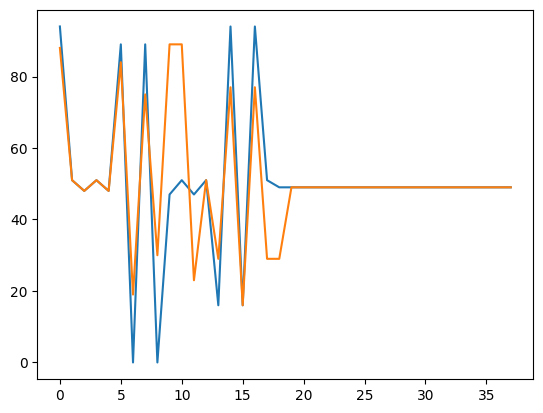

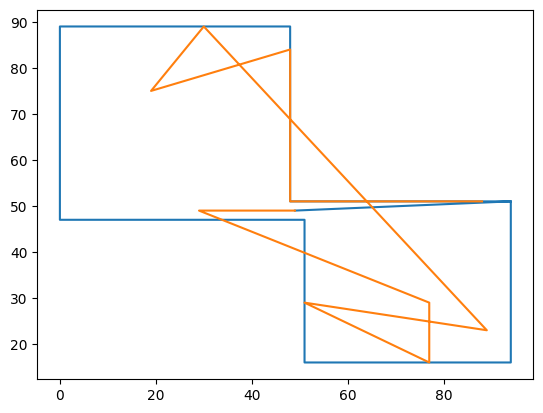

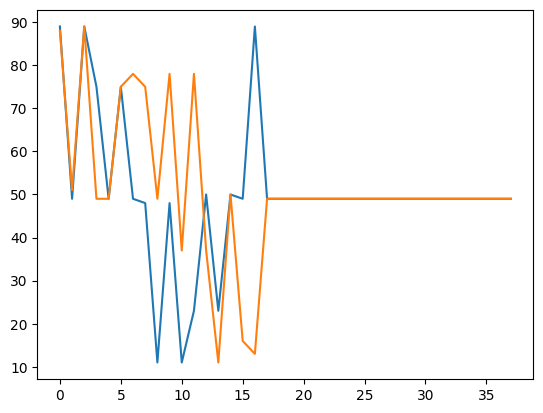

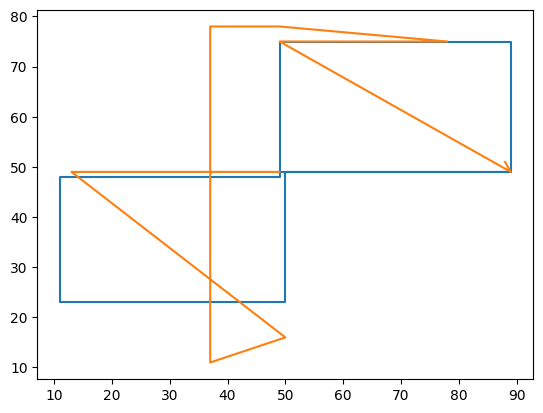

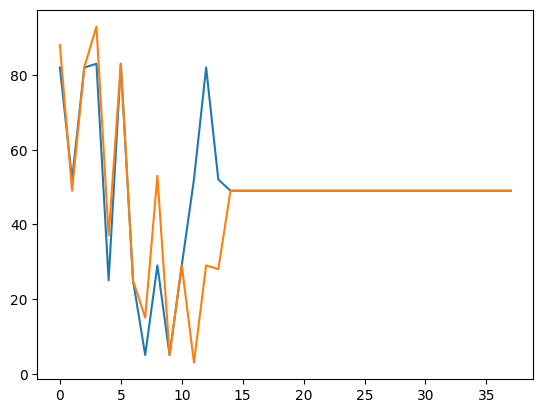

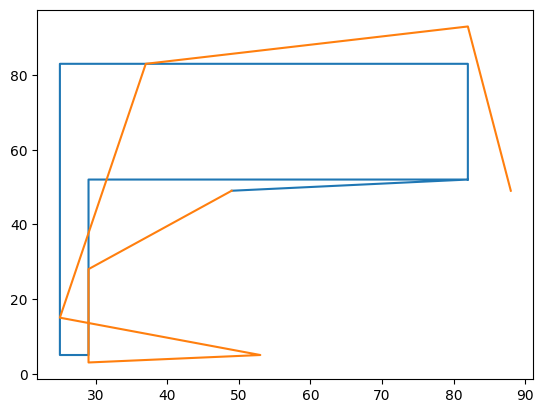

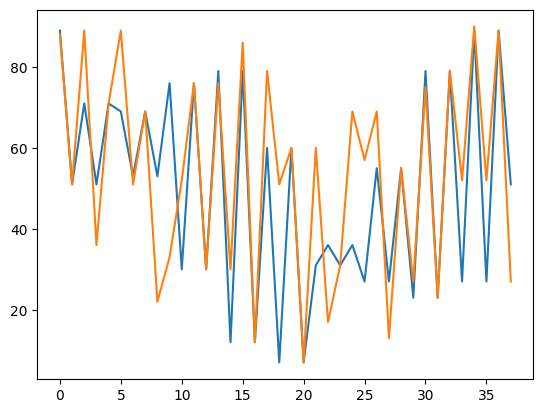

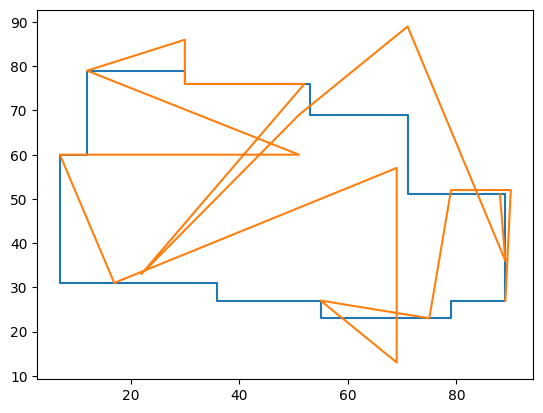

In [113]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach().cpu())
  plt.plot(p[i].detach().argmax(1).cpu())
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

In [116]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    # self.xemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    # self.yemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.emb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.blocks = nn.ModuleList([LatentAttentionBlock(residual_depth) for _ in range(num_blocks)])
    self.norm = nn.LayerNorm(residual_depth, bias=False)
    self.out = nn.Linear(residual_depth, n_toks, bias=False)
  
  def forward(self, x:torch.Tensor):
    # x = x.reshape(len(x), -1, 2)
    # x = torch.cat([self.xemb(x[:,:,0]).unsqueeze(2), self.yemb(x[:,:,1]).unsqueeze(2)], dim=2)
    # x = x.reshape(len(x), -1, residual_depth)
    # x = x.reshape(len(x), -1, residual_depth)
    x = self.emb(x)
    x = self.norm(x)
    for block in self.blocks: x = block(x)
    x = self.norm(x)
    x = self.out(x)
    return x

net = Model().to(device, dtype).train()
opt = optim.Adam(net.parameters(), lr=3e-4)

In [117]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    # self.xemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    # self.yemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.emb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.blocks = nn.ModuleList([LatentAttentionBlock(residual_depth) for _ in range(num_blocks)])
    self.norm = nn.LayerNorm(residual_depth, bias=False)
    self.out = nn.Linear(residual_depth, n_toks, bias=False)
  
  def forward(self, x:torch.Tensor):
    # x = x.reshape(len(x), -1, 2)
    # x = torch.cat([self.xemb(x[:,:,0]).unsqueeze(2), self.yemb(x[:,:,1]).unsqueeze(2)], dim=2)
    # x = x.reshape(len(x), -1, residual_depth)
    # x = x.reshape(len(x), -1, residual_depth)
    x = self.emb(x)
    x = self.norm(x)
    for block in self.blocks: x = block(x)
    x = self.norm(x)
    x = self.out(x)
    return x

net = Model().to(device, dtype).train()
opt = optim.Adam(net.parameters(), lr=3e-4)

In [118]:
def random_shape():
  n = np.random.randint(3, 10)
  corners = []
  for i in range(n):
    angle = 2*np.pi*i/n + np.random.rand()*0.1
    r = np.random.rand() * 0.5 + 0.5
    corners.append(torch.tensor([np.cos(angle)*r, np.sin(angle)*r],dtype=torch.float32))
  verts = []
  corner_dir = np.random.randint(2)
  for i in range(n + 1):
    verts.append(corners[i % n])
    verts.append(torch.tensor([corners[(i+corner_dir) % n][0] , corners[(i + 1 - corner_dir) % n][1]]))

  verts = torch.stack(verts[:-1])
  return verts

max_points = 19

def display(s):
  s = s[:2 * max_points]
  s = s.reshape(-1,2)
  plt.plot(s[:,0].cpu().numpy(), s[:,1].cpu().numpy())


def gen_data(n):
  shapes = [random_shape() for _ in range(n)]
  x = torch.stack([torch.cat([s, torch.zeros(max_points - len(s), 2)]) for s in shapes])

  x = x.view(n, -1)
  x = (x - x.min()) / (x.max() - x.min()) * (n_toks-1)
  x = x.long()
  pad = torch.zeros(n, 1).long()
  y = x
  x = torch.cat([pad, x], dim=1)[:, :-1]
  return x, y

x,y = gen_data(100)

In [119]:
def step(x,y):
  opt.zero_grad()
  out = net(x)
  loss = F.cross_entropy(out.reshape(-1, n_toks),y.flatten())
  loss.backward()
  opt.step()
  return loss

In [120]:
epochs = 10_000
l = step(x,y)
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

0.12184444814920425
0.12168356031179428
0.12161372601985931
0.12151304632425308
0.12147641181945801
0.12144982814788818
0.12147817015647888
0.12141235172748566
0.12140196561813354
0.12142078578472137


******* TEST *******


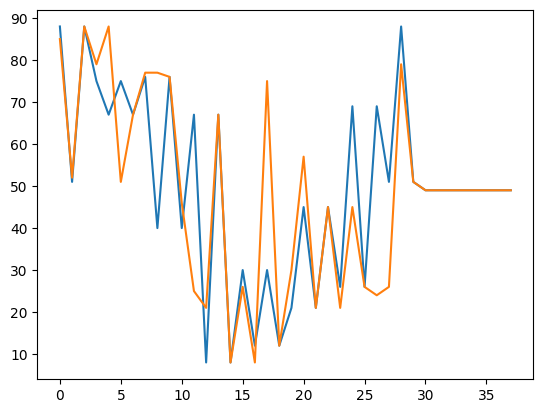

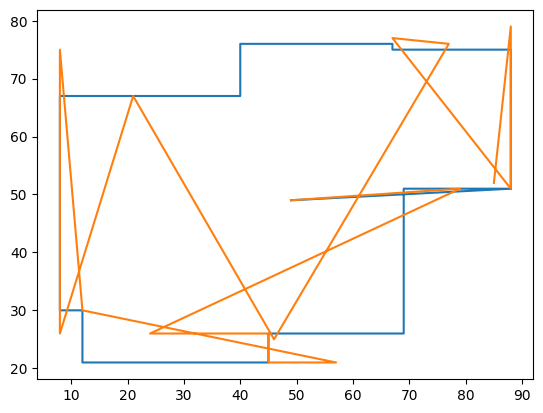

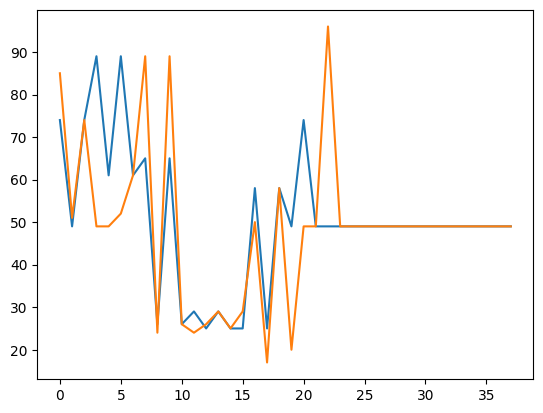

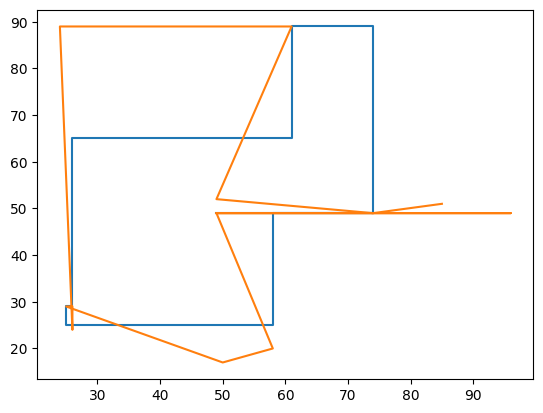

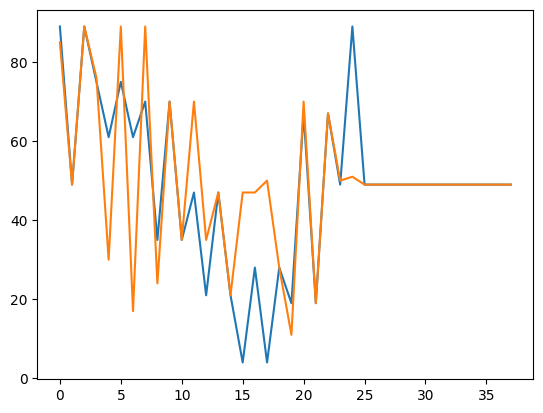

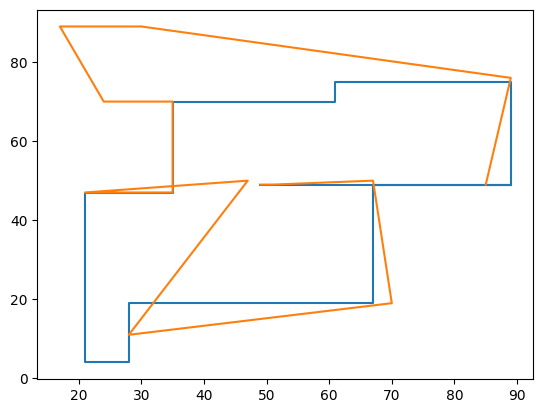

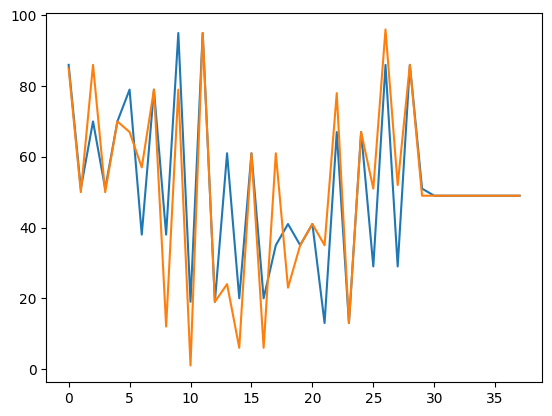

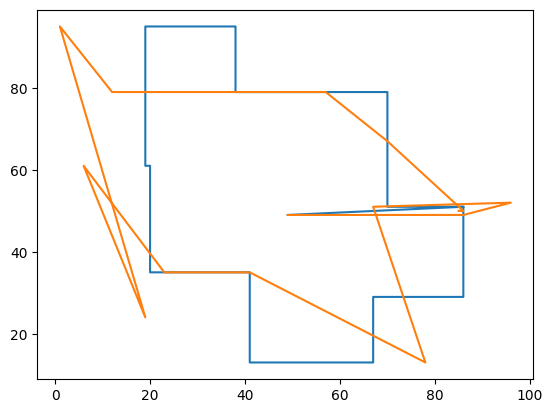

In [121]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach().cpu())
  plt.plot(p[i].detach().argmax(1).cpu())
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

In [122]:
epochs = 10_000
l = step(x,y)
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

0.12152990698814392
0.12141486257314682
0.12140557914972305
0.12139367312192917
0.12138688564300537
0.12137411534786224
0.12137307226657867
0.12137378007173538
0.12146300822496414
0.12148510664701462


******* TEST *******


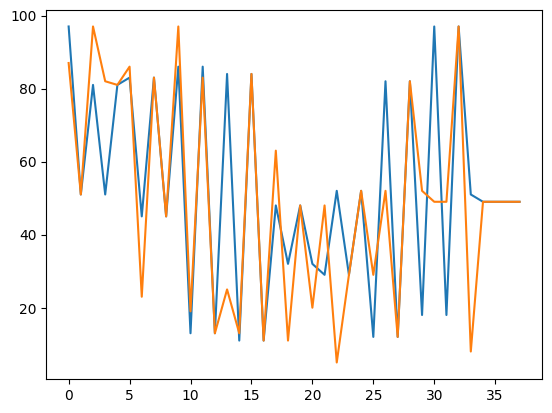

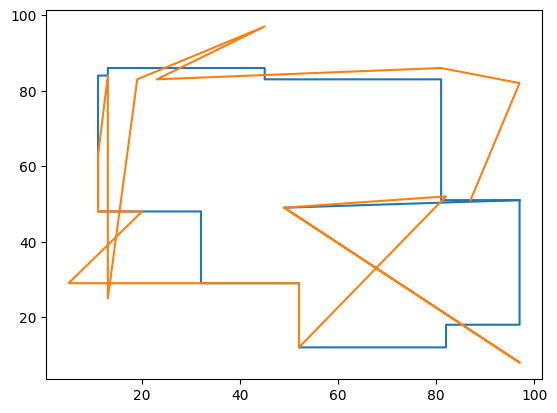

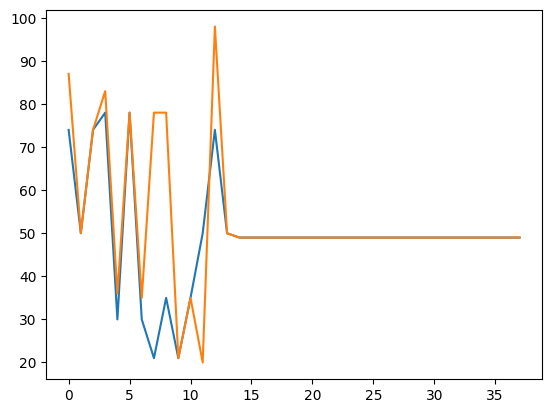

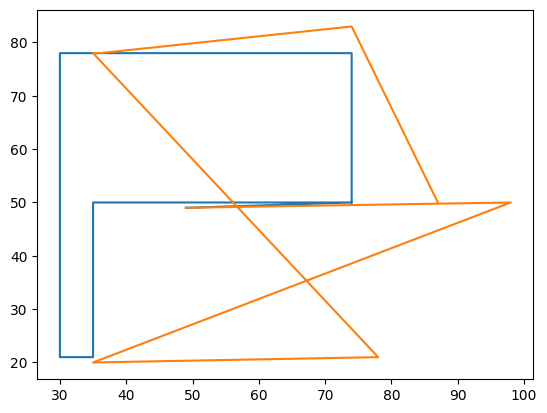

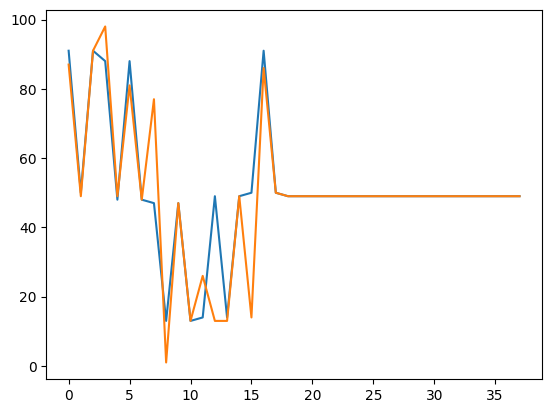

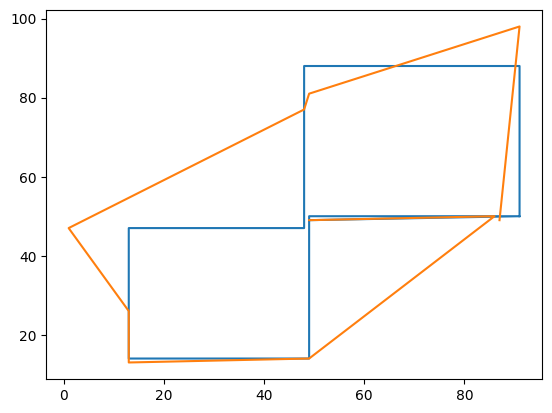

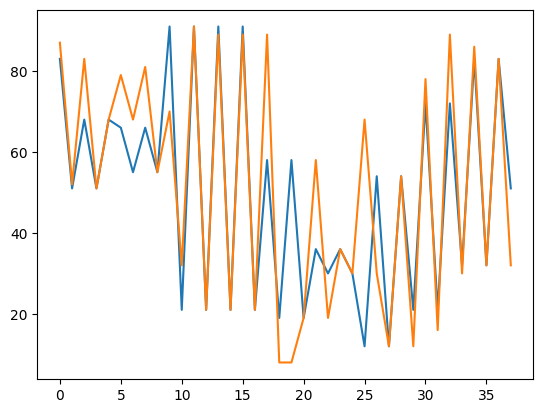

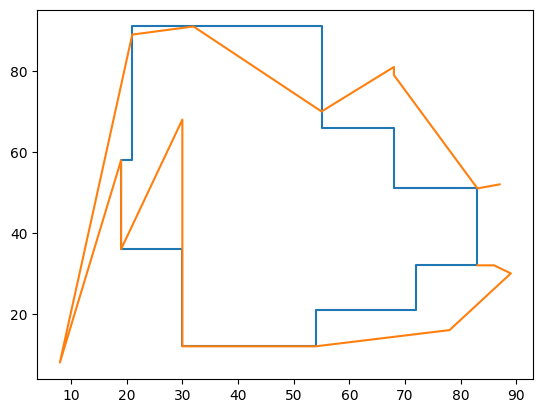

In [123]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach().cpu())
  plt.plot(p[i].detach().argmax(1).cpu())
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

0.12147542089223862
0.12143442034721375
0.1214151680469513
0.12140016257762909
0.12137781083583832
0.12137730419635773
0.12135551869869232
0.12136530876159668
0.12135796248912811
0.12135244905948639
******* TEST *******


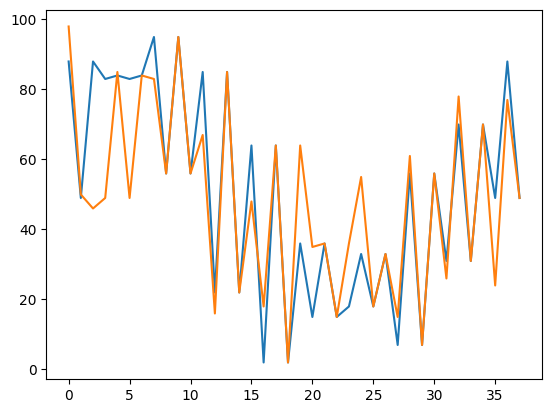

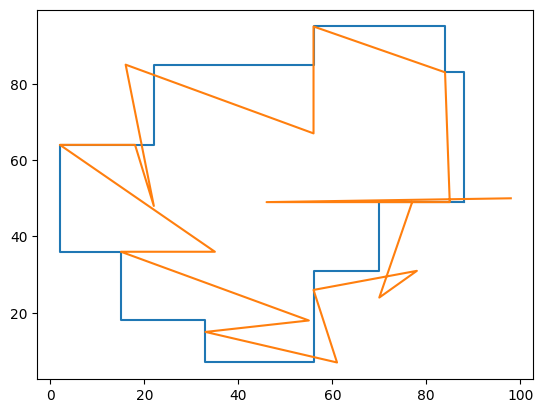

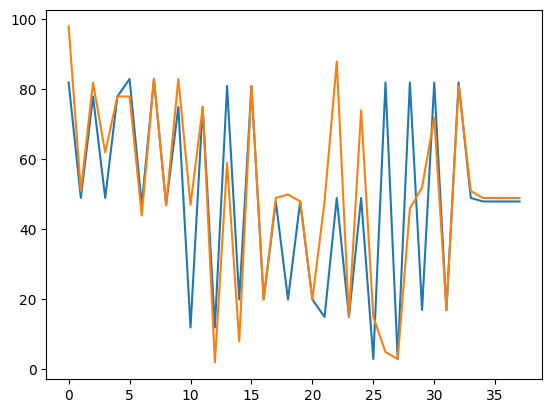

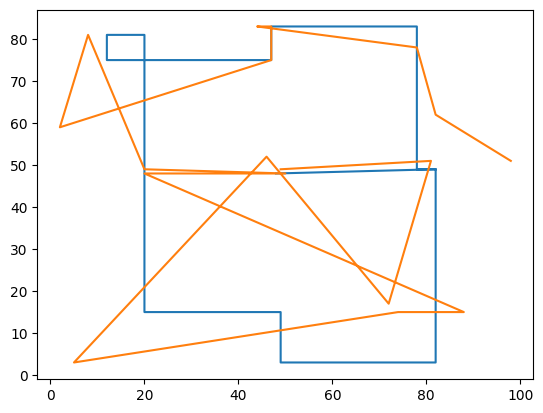

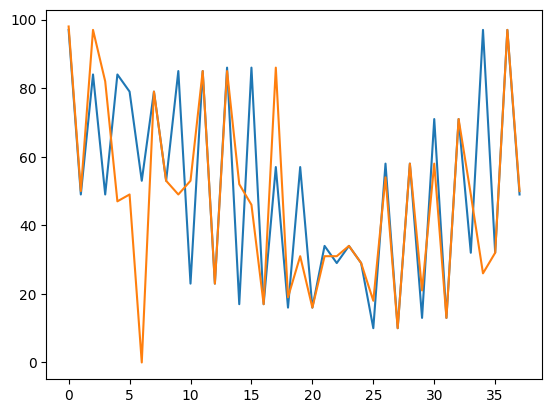

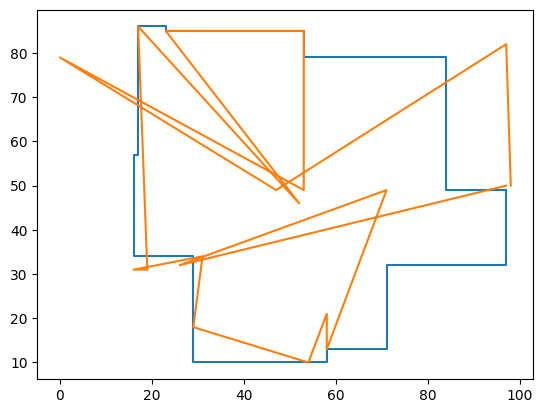

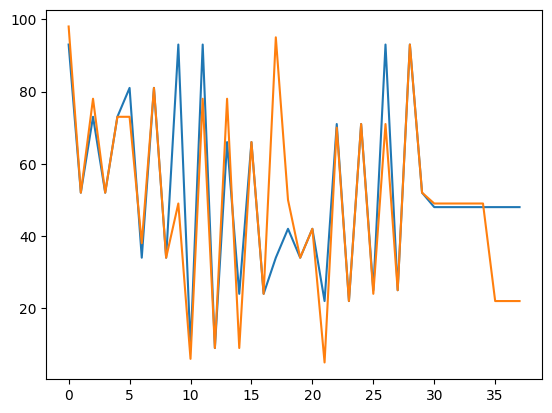

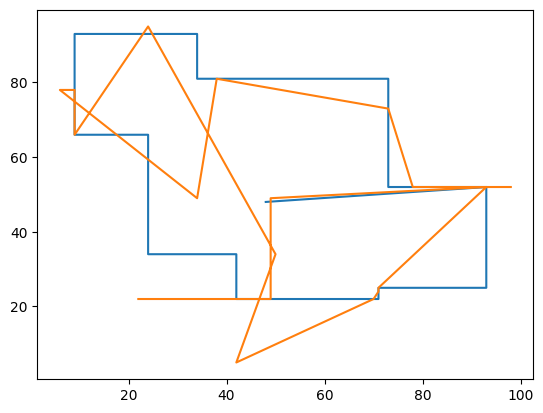

In [124]:
epochs = 10_000
l = step(x,y)
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())



print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach().cpu())
  plt.plot(p[i].detach().argmax(1).cpu())
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

In [125]:
x[0,0]

tensor(0)

******* INFERENCE ********


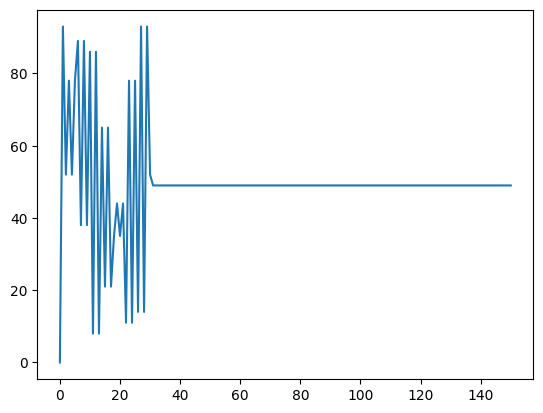

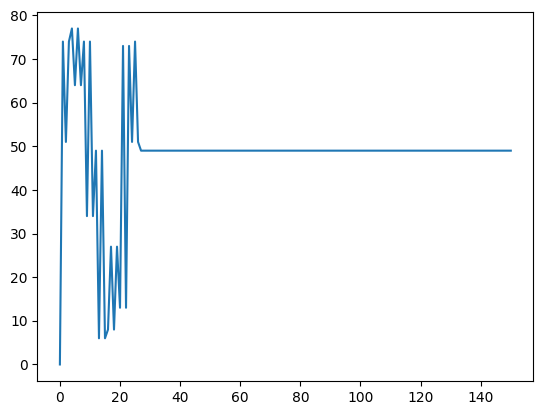

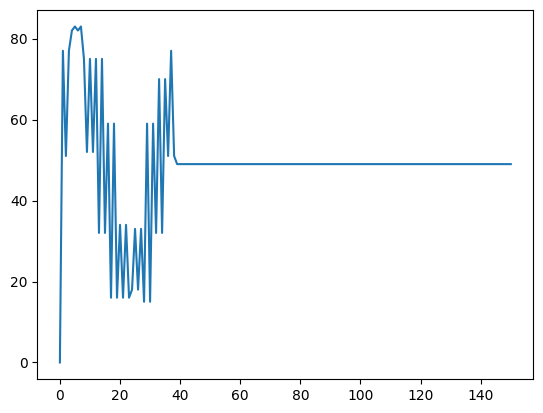

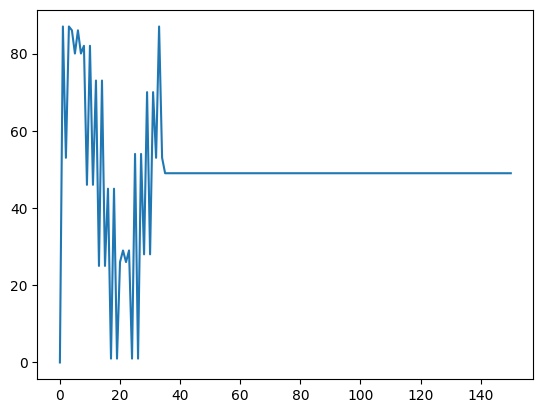

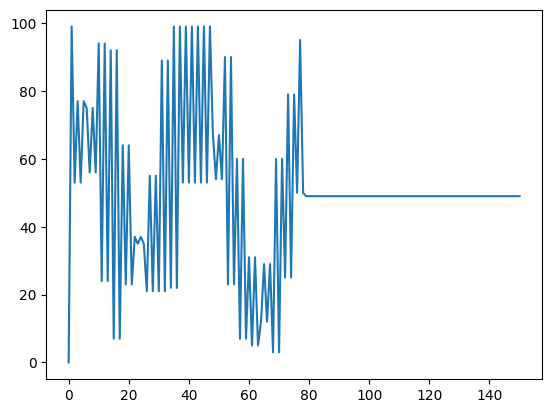

In [126]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(150)
  plt.plot(p[0,:].cpu().numpy())
  plt.show()

******* INFERENCE ********


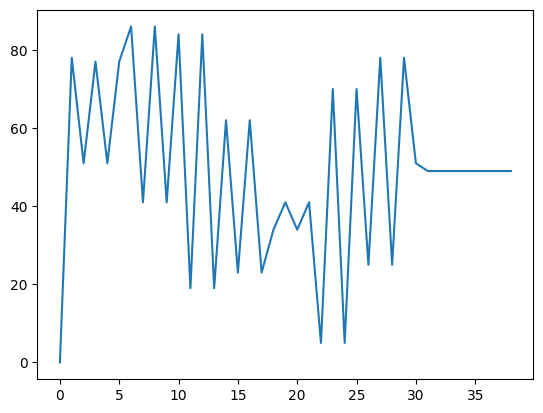

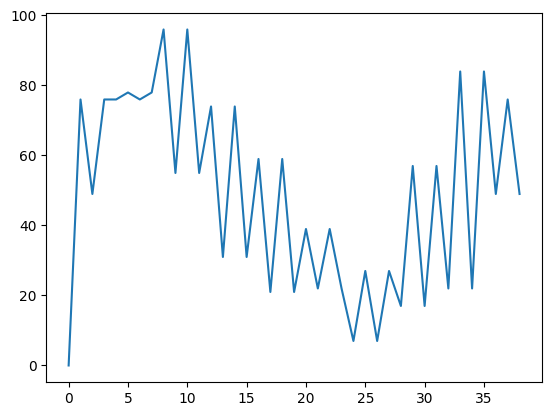

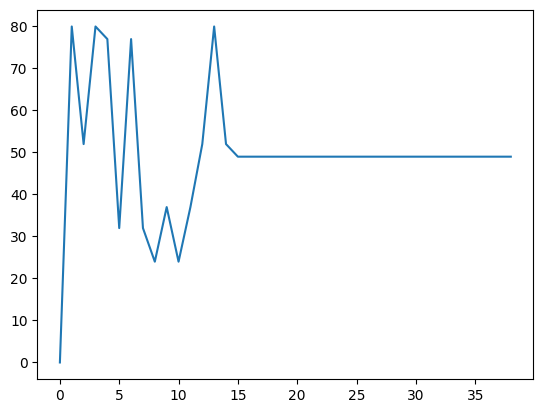

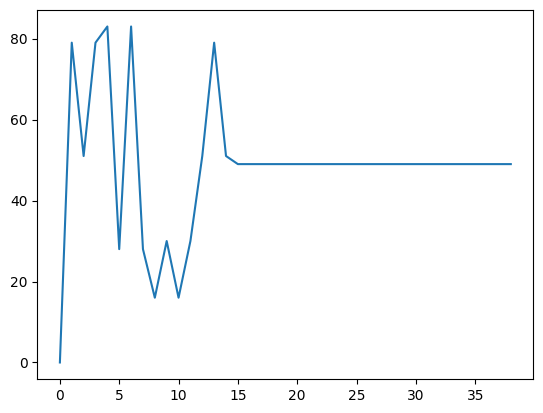

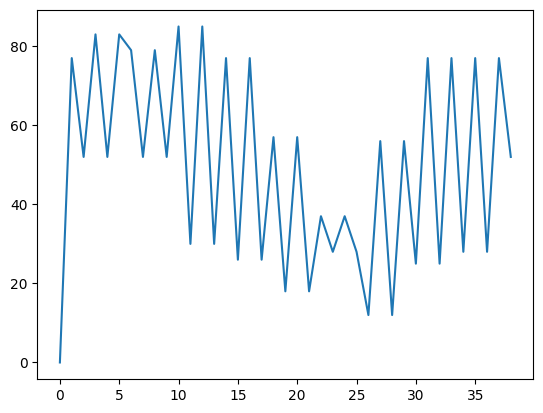

In [127]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.plot(p[0,:].cpu().numpy())
  plt.show()

******* INFERENCE ********


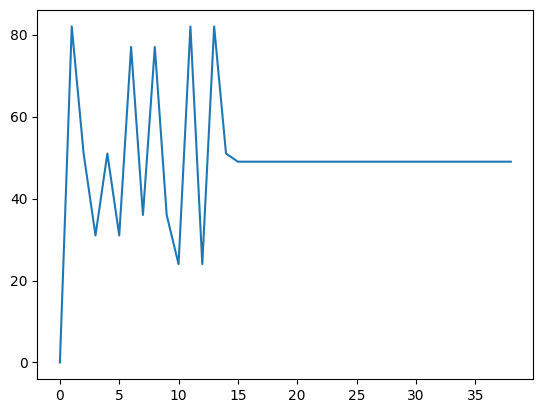

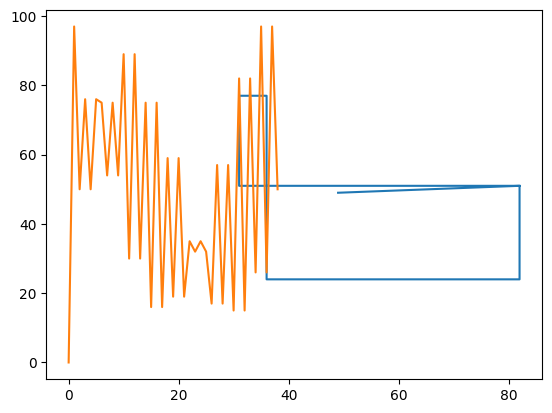

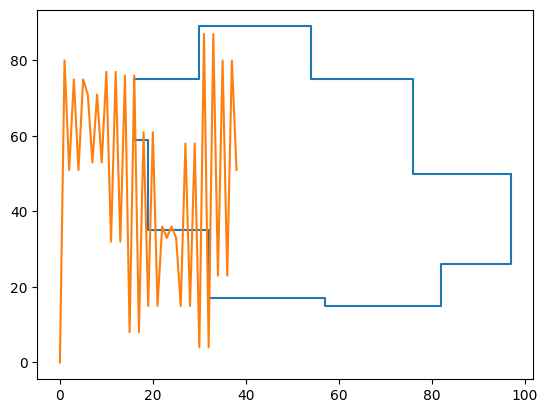

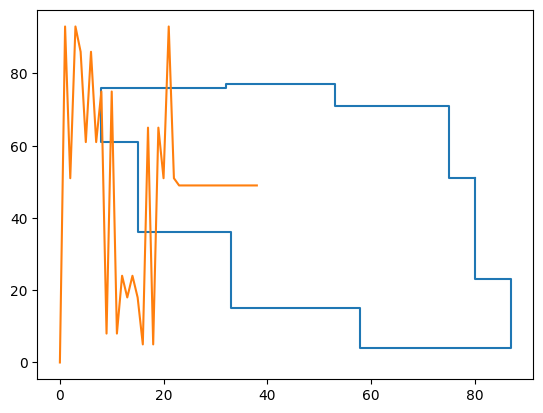

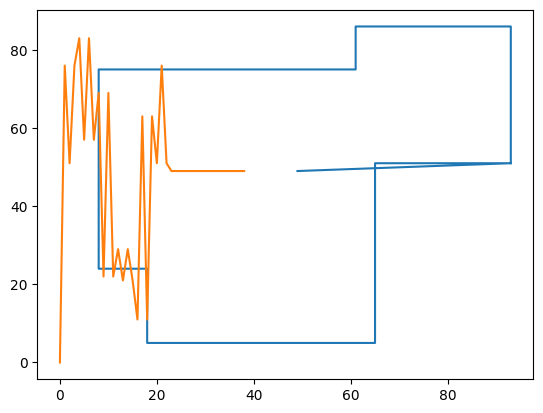

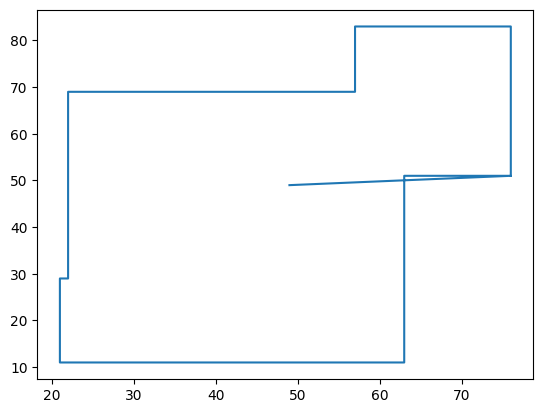

In [128]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.plot(p[0,:].cpu().numpy())
  plt.show()
  display(p[0,1:])

******* INFERENCE ********


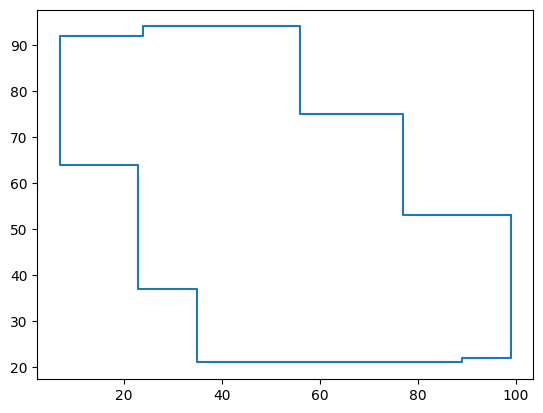

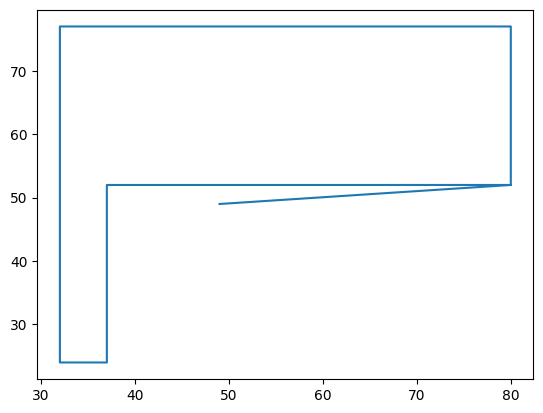

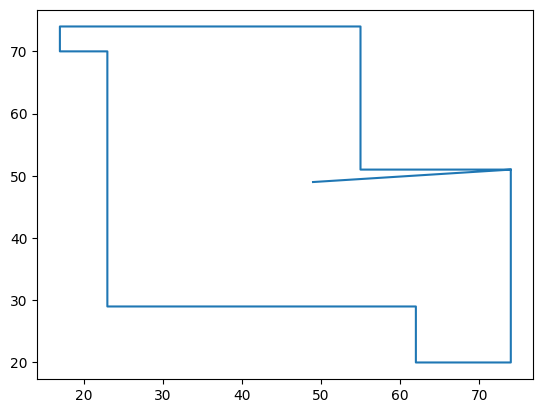

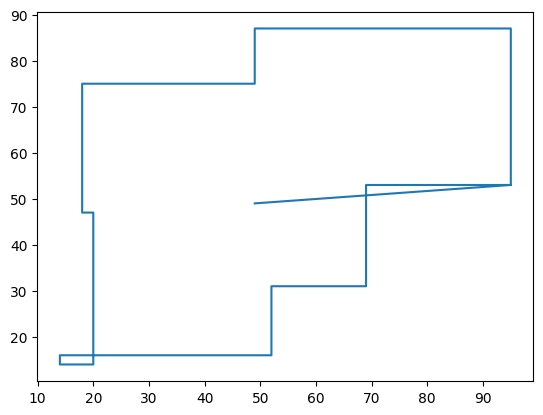

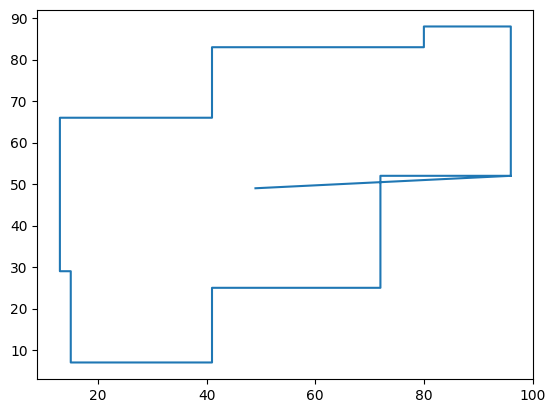

In [129]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

In [130]:
epochs = 10_000
l = step(x,y)
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())



print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach().cpu())
  plt.plot(p[i].detach().argmax(1).cpu())
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

0.12144690006971359


KeyboardInterrupt: 

******* TEST *******


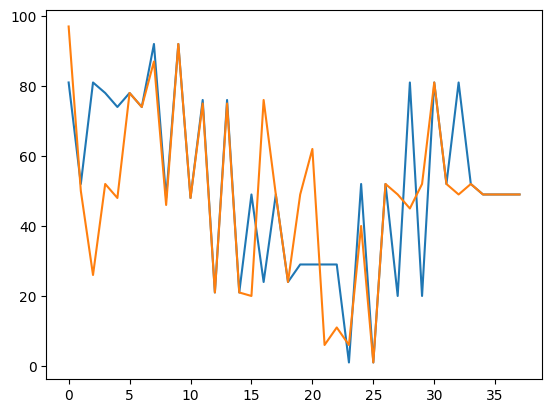

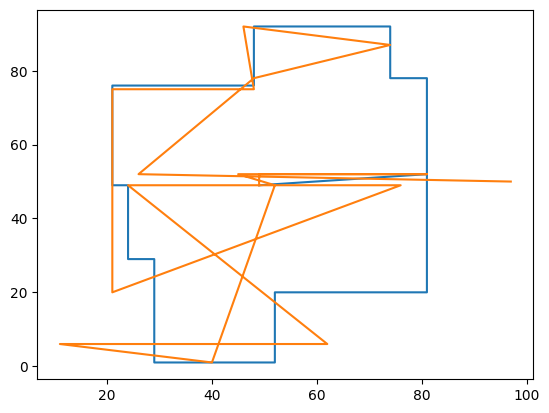

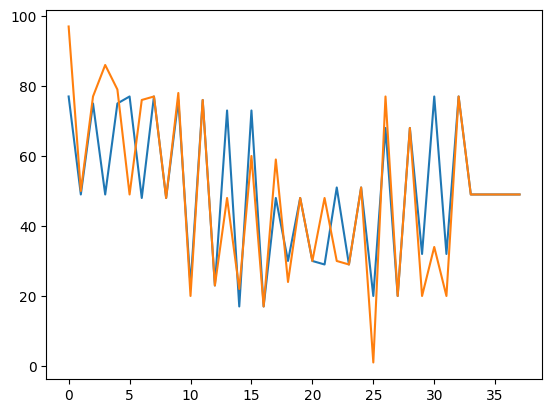

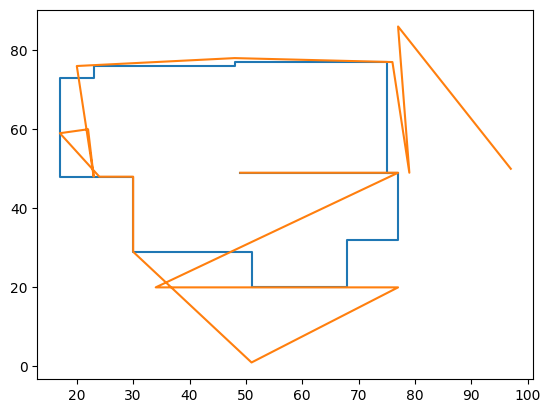

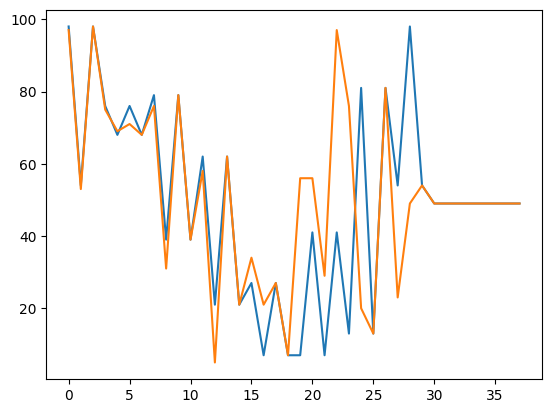

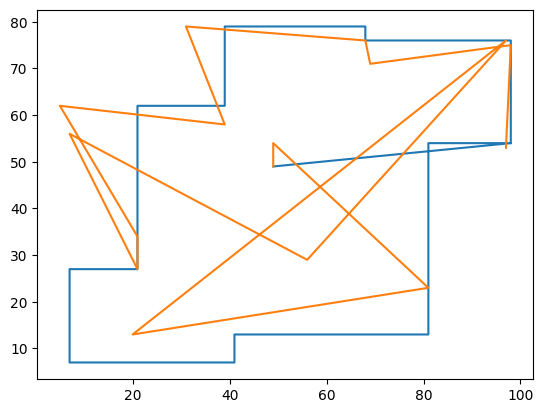

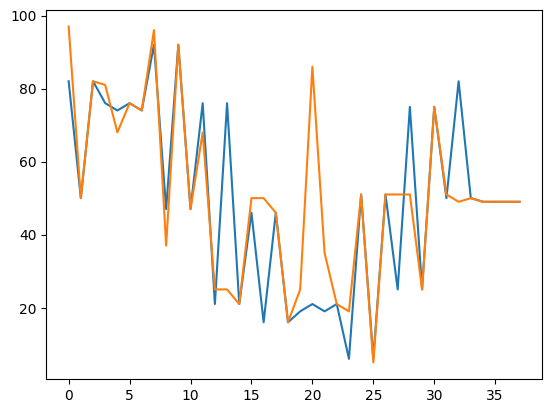

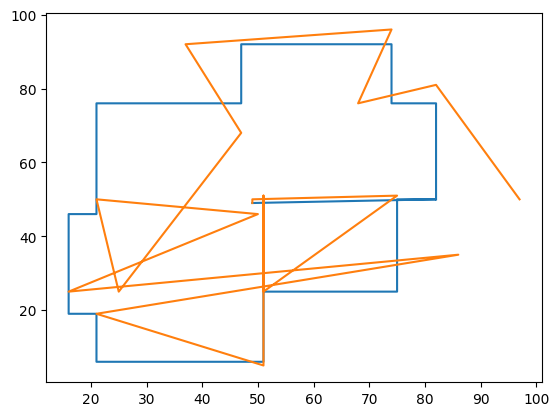

In [131]:
print("******* TEST *******")
x,y = gen_data(100)
p = net(x)
for i in range(4):

  plt.plot(y[i].detach().cpu())
  plt.plot(p[i].detach().argmax(1).cpu())
  plt.show()

  display(y[i].detach())
  display(p[i].detach().argmax(1))
  plt.show()

In [132]:
epochs = 10_000
l = step(x,y)
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

0.12147316336631775
0.12142753601074219
0.1213989108800888
0.12139834463596344
0.12137465178966522


KeyboardInterrupt: 

******* INFERENCE ********


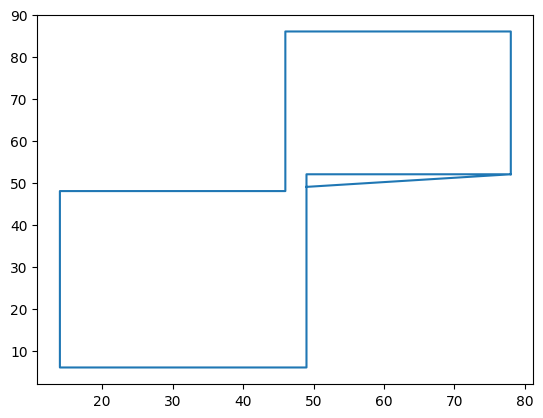

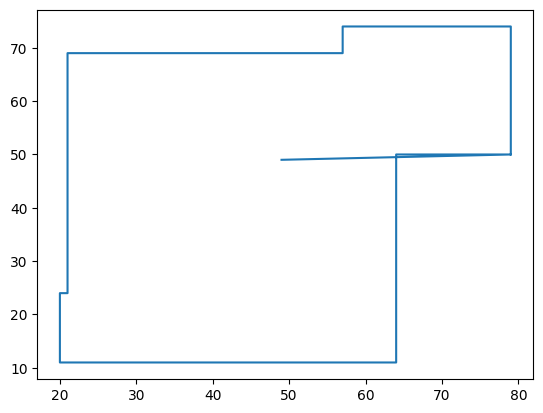

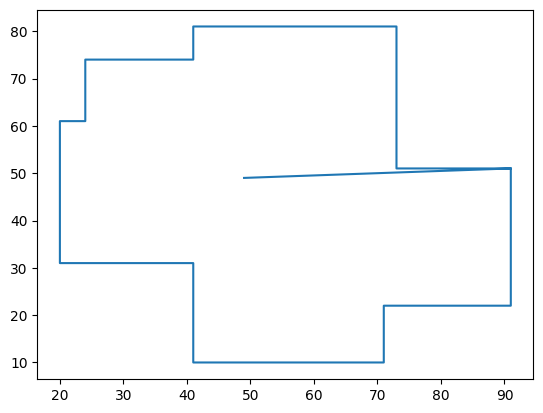

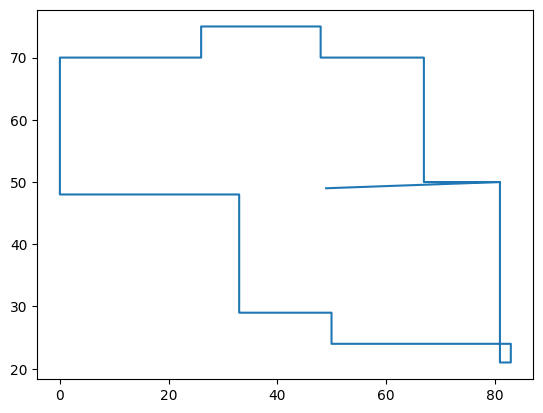

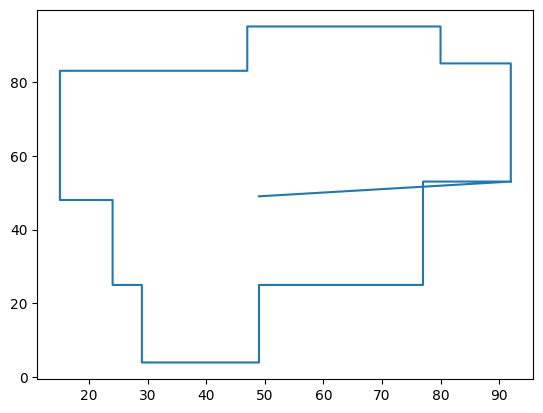

In [133]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

In [134]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    # self.xemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    # self.yemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.emb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.blocks = nn.ModuleList([LatentAttentionBlock(residual_depth) for _ in range(num_blocks)])
    self.norm = nn.LayerNorm(residual_depth, bias=False)
    self.out = nn.Linear(residual_depth, n_toks, bias=False)
  
  def forward(self, x:torch.Tensor):
    # x = x.reshape(len(x), -1, 2)
    # x = torch.cat([self.xemb(x[:,:,0]).unsqueeze(2), self.yemb(x[:,:,1]).unsqueeze(2)], dim=2)
    # x = x.reshape(len(x), -1, residual_depth)
    # x = x.reshape(len(x), -1, residual_depth)
    x = self.emb(x)
    x = self.norm(x)
    for block in self.blocks: x = block(x)
    x = self.norm(x)
    x = self.out(x)
    return x

net = Model().to(device, dtype).train()
opt = optim.Adam(net.parameters(), lr=3e-4)

In [135]:
def random_shape():
  n = np.random.randint(3, 10)
  corners = []
  for i in range(n):
    angle = 2*np.pi*i/n + np.random.rand()*0.1
    r = np.random.rand() * 0.5 + 0.5
    corners.append(torch.tensor([np.cos(angle)*r, np.sin(angle)*r],dtype=torch.float32))
  verts = []
  corner_dir = np.random.randint(2)
  for i in range(n + 1):
    verts.append(corners[i % n])
    verts.append(torch.tensor([corners[(i+corner_dir) % n][0] , corners[(i + 1 - corner_dir) % n][1]]))

  verts = torch.stack(verts[:-1])
  return verts

max_points = 19

def display(s):
  s = s[:2 * max_points]
  s = s.reshape(-1,2)
  plt.plot(s[:,0].cpu().numpy(), s[:,1].cpu().numpy())


def gen_data(n):
  shapes = [random_shape() for _ in range(n)]
  x = torch.stack([torch.cat([s, torch.zeros(max_points - len(s), 2)]) for s in shapes])

  x = x.view(n, -1)
  x = (x - x.min()) / (x.max() - x.min()) * (n_toks-1)
  x = x.long()
  pad = torch.zeros(n, 1).long()
  y = x
  x = torch.cat([pad, x], dim=1)[:, :-1]
  return x, y

x,y = gen_data(100)

In [136]:
def step(x,y):
  opt.zero_grad()
  out = net(x)
  loss = F.cross_entropy(out.reshape(-1, n_toks),y.flatten())
  loss.backward()
  opt.step()
  return loss

In [137]:
epochs = 10_000
l = step(x,y)
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

0.1218944787979126


KeyboardInterrupt: 

In [138]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    # self.xemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    # self.yemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.emb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.blocks = nn.ModuleList([LatentAttentionBlock(residual_depth) for _ in range(num_blocks)])
    self.norm = nn.LayerNorm(residual_depth, bias=False)
    self.out = nn.Linear(residual_depth, n_toks, bias=False)
  
  def forward(self, x:torch.Tensor):
    # x = x.reshape(len(x), -1, 2)
    # x = torch.cat([self.xemb(x[:,:,0]).unsqueeze(2), self.yemb(x[:,:,1]).unsqueeze(2)], dim=2)
    # x = x.reshape(len(x), -1, residual_depth)
    # x = x.reshape(len(x), -1, residual_depth)
    x = self.emb(x)
    x = self.norm(x)
    for block in self.blocks: x = block(x)
    x = self.norm(x)
    x = self.out(x)
    return x

net = Model().to(device, dtype).train()
opt = optim.Adam(net.parameters(), lr=3e-4)

In [139]:
def random_shape():
  n = np.random.randint(3, 10)
  corners = []
  for i in range(n):
    angle = 2*np.pi*i/n + np.random.rand()*0.1
    r = np.random.rand() * 0.5 + 0.5
    corners.append(torch.tensor([np.cos(angle)*r, np.sin(angle)*r],dtype=torch.float32))
  verts = []
  corner_dir = np.random.randint(2)
  for i in range(n + 1):
    verts.append(corners[i % n])
    verts.append(torch.tensor([corners[(i+corner_dir) % n][0] , corners[(i + 1 - corner_dir) % n][1]]))

  verts = torch.stack(verts[:-1])
  return verts

max_points = 19

def display(s):
  s = s[:2 * max_points]
  s = s.reshape(-1,2)
  plt.plot(s[:,0].cpu().numpy(), s[:,1].cpu().numpy())


def gen_data(n):
  shapes = [random_shape() for _ in range(n)]
  x = torch.stack([torch.cat([s, torch.zeros(max_points - len(s), 2)]) for s in shapes])

  x = x.view(n, -1)
  x = (x - x.min()) / (x.max() - x.min()) * (n_toks-1)
  x = x.long()
  pad = torch.zeros(n, 1).long()
  y = x
  x = torch.cat([pad, x], dim=1)[:, :-1]
  return x, y

x,y = gen_data(100)

In [140]:
def step(x,y):
  opt.zero_grad()
  out = net(x)
  loss = F.cross_entropy(out.reshape(-1, n_toks),y.flatten())
  loss.backward()
  opt.step()
  return loss

In [141]:
epochs = 10_000
l = step(x,y)
print(l.item)()
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

<built-in method item of Tensor object at 0x7f2791e8c2f0>


TypeError: 'NoneType' object is not callable

In [142]:
epochs = 10_000
l = step(x,y)
print(l.item)
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

<built-in method item of Tensor object at 0x7f2791e51a30>


KeyboardInterrupt: 

In [143]:
epochs = 10_000
l = step(x,y)
print(l.item())
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

0.12272920459508896


KeyboardInterrupt: 

In [144]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    # self.xemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    # self.yemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.emb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.blocks = nn.ModuleList([LatentAttentionBlock(residual_depth) for _ in range(num_blocks)])
    self.norm = nn.LayerNorm(residual_depth, bias=False)
    self.out = nn.Linear(residual_depth, n_toks, bias=False)
  
  def forward(self, x:torch.Tensor):
    # x = x.reshape(len(x), -1, 2)
    # x = torch.cat([self.xemb(x[:,:,0]).unsqueeze(2), self.yemb(x[:,:,1]).unsqueeze(2)], dim=2)
    # x = x.reshape(len(x), -1, residual_depth)
    # x = x.reshape(len(x), -1, residual_depth)
    x = self.emb(x)
    x = self.norm(x)
    for block in self.blocks: x = block(x)
    x = self.norm(x)
    x = self.out(x)
    return x

net = Model().to(device, dtype).train()
opt = optim.Adam(net.parameters(), lr=3e-4)

In [145]:
epochs = 10_000
l = step(x,y)
print(l.item())
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

4.673973083496094
0.12228694558143616
0.12172359973192215
0.1215757504105568
0.12151367217302322
0.12147784978151321
0.1214609295129776
0.12143192440271378
0.12141549587249756
0.12139508128166199
0.12139710783958435


******* INFERENCE ********


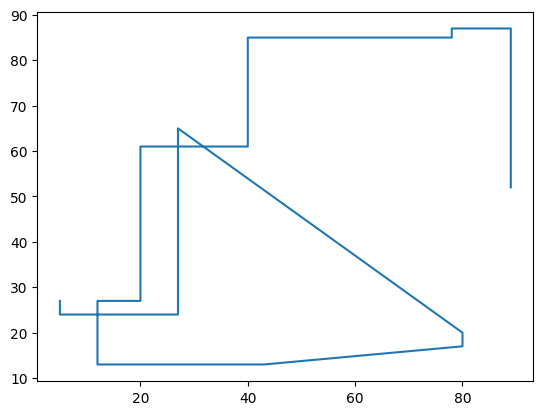

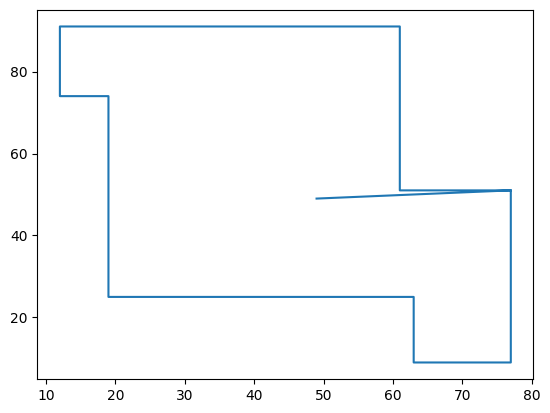

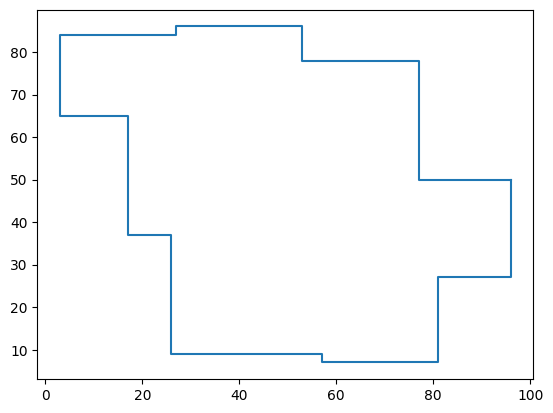

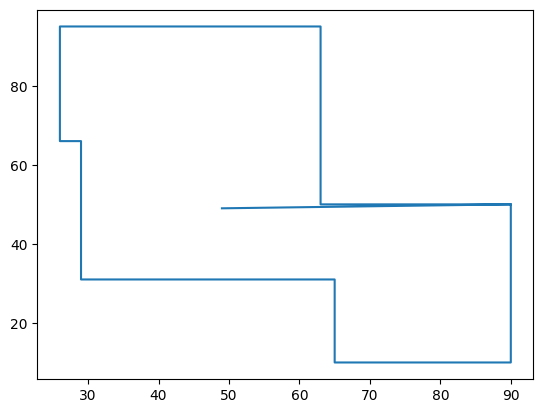

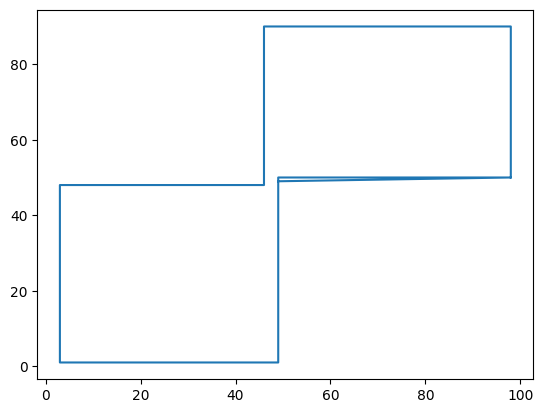

In [146]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

******* INFERENCE ********


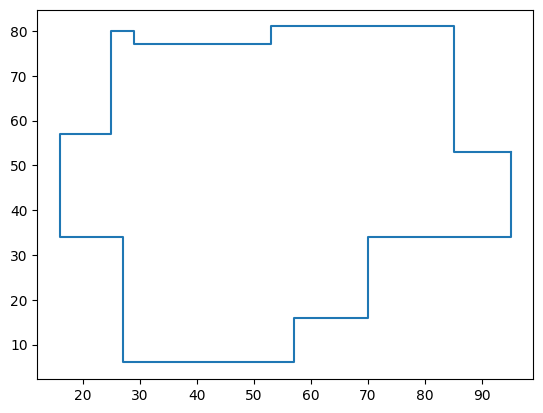

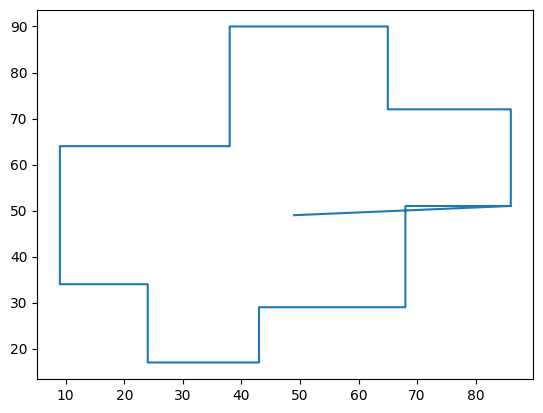

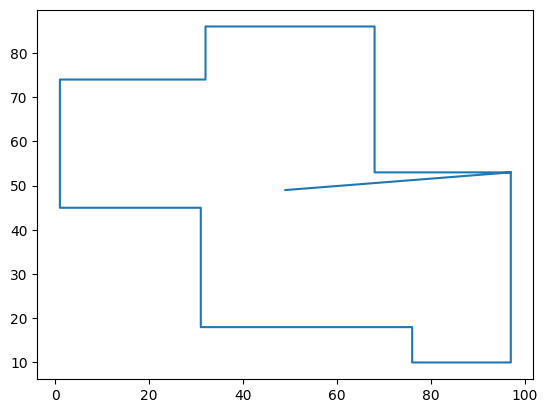

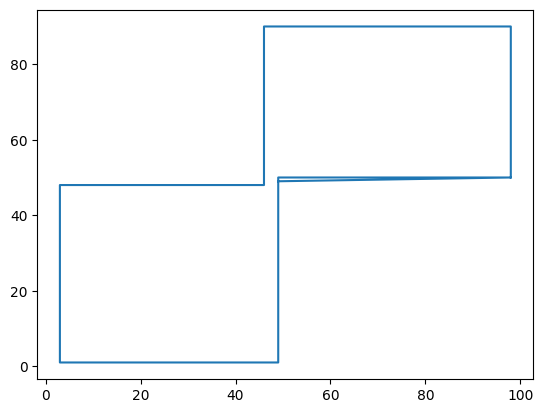

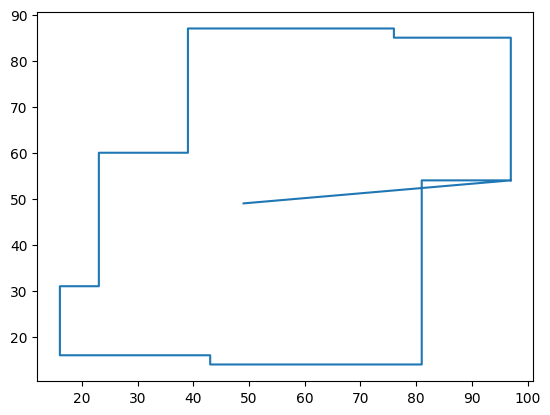

In [147]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

******* INFERENCE ********


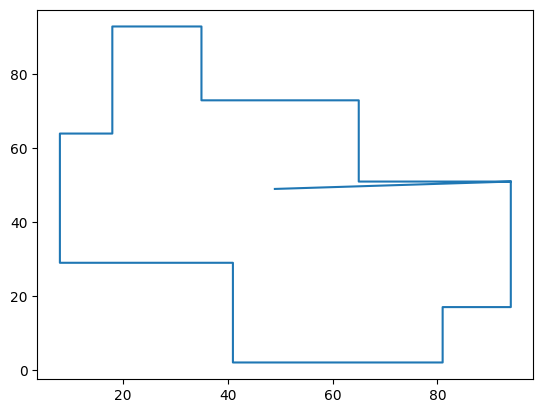

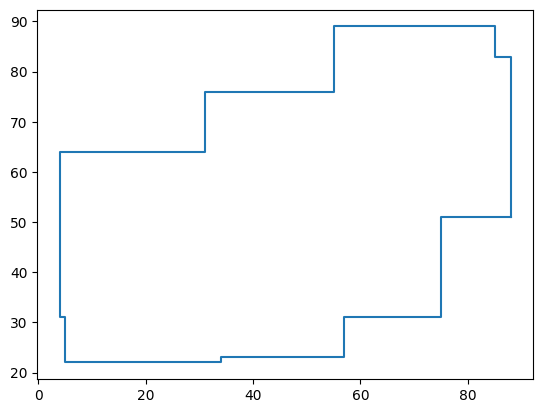

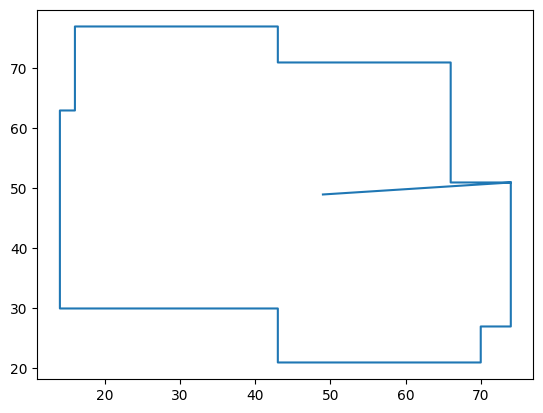

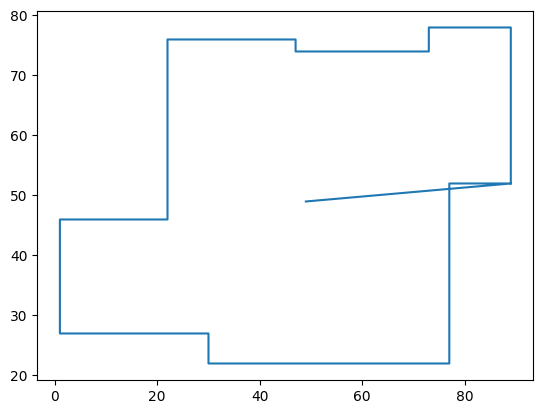

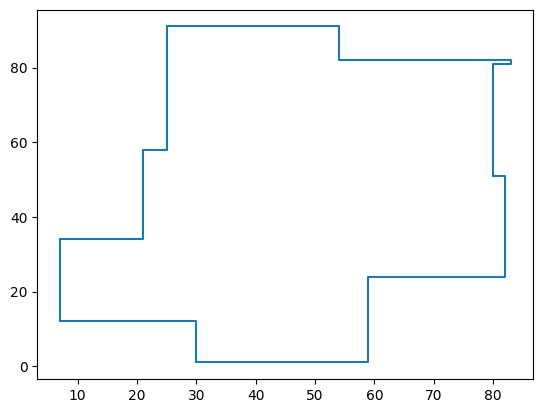

In [148]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

******* INFERENCE ********


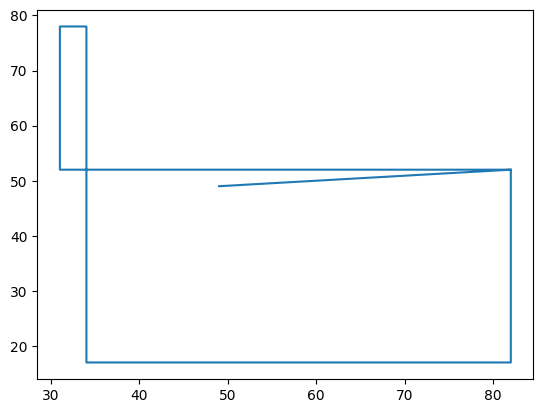

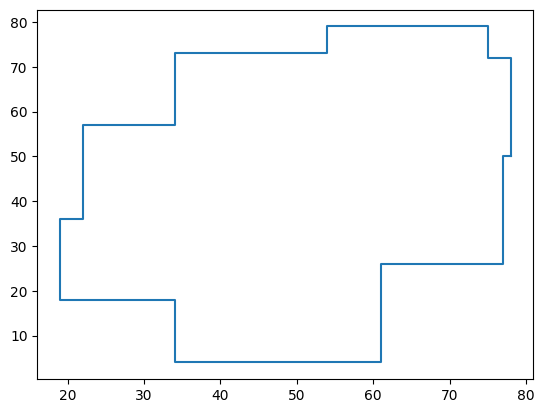

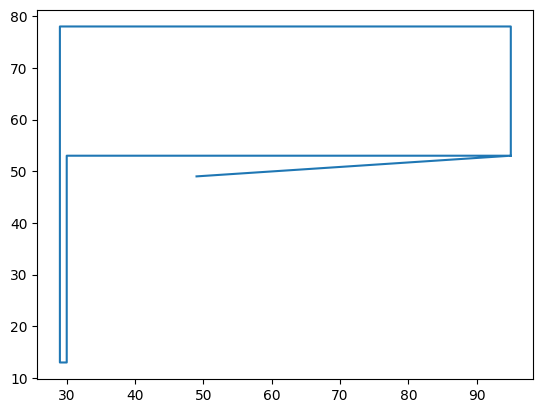

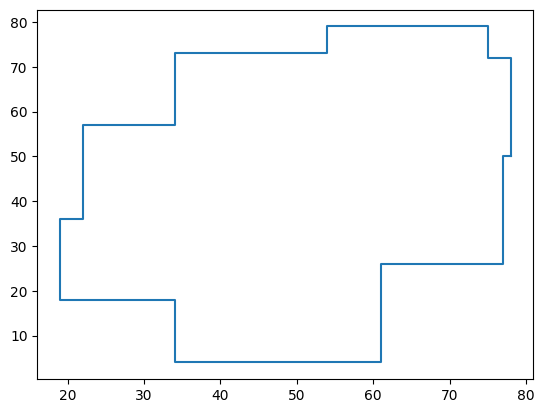

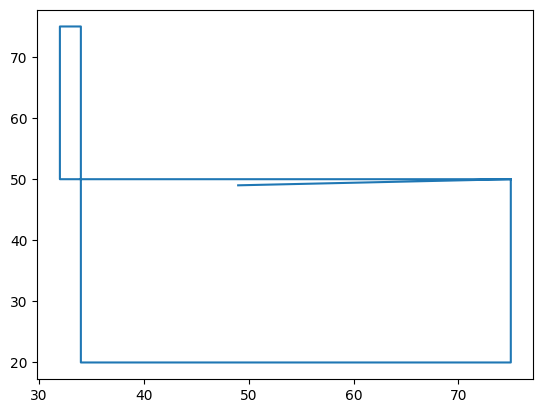

In [149]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

In [150]:
p

tensor([[ 0, 75, 50, 32, 50, 32, 75, 34, 75, 34, 20, 75, 20, 75, 50, 49, 49, 49,
         49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
         49, 49, 49]])

******* INFERENCE ********


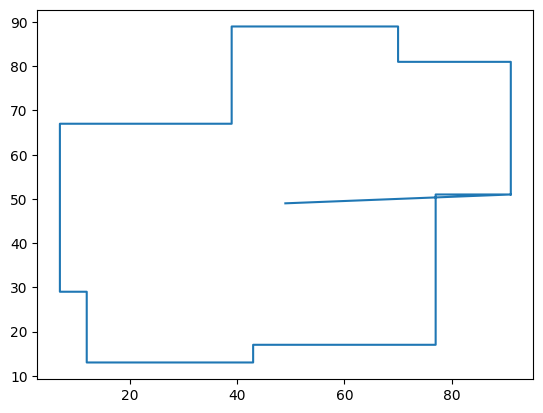

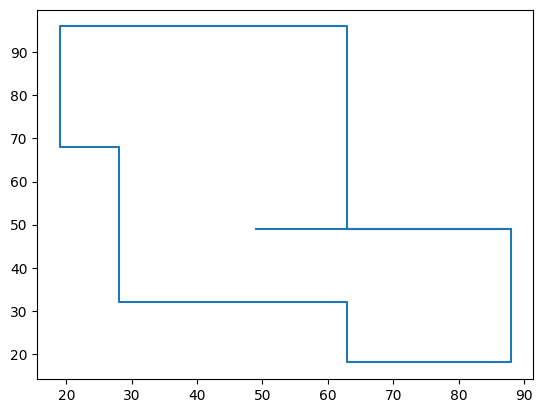

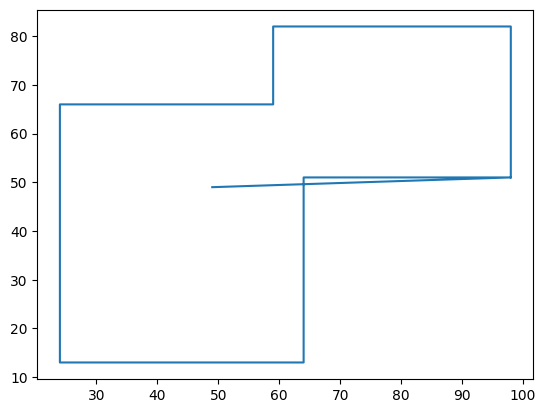

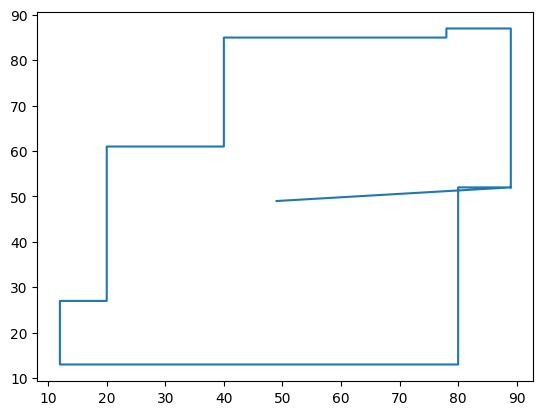

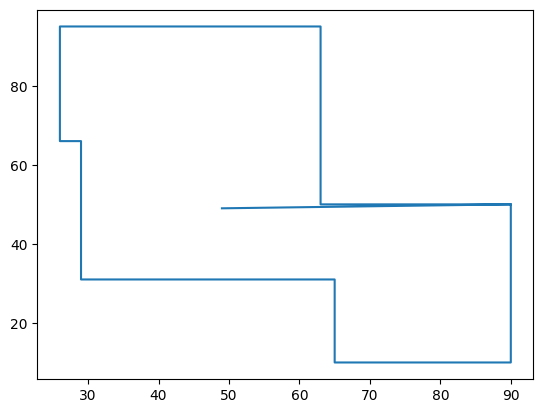

In [151]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
    if (x[-2:] == 49).all():
      break
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

In [152]:
p

tensor([[ 0, 90, 50, 63, 50, 63, 95, 26, 95, 26, 66, 29, 66, 29, 31, 65, 31, 65,
         10, 90, 10, 90, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
         49, 49, 49]])

In [153]:
p[0,-2:]

tensor([49, 49])

In [154]:
p[0,-2:]==49

tensor([True, True])

In [155]:
(p[0,-2:]==49).all

<function Tensor.all>

In [156]:
(p[0,-2:]==49).all()

tensor(True)

******* INFERENCE ********


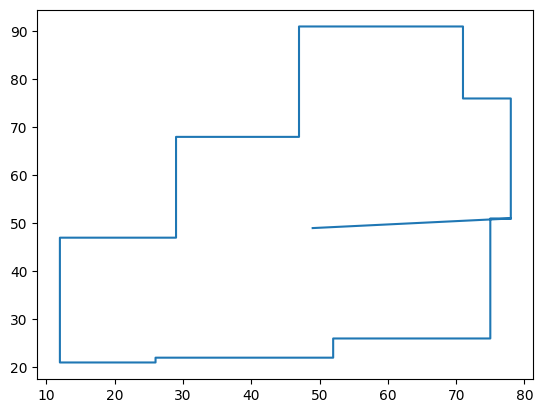

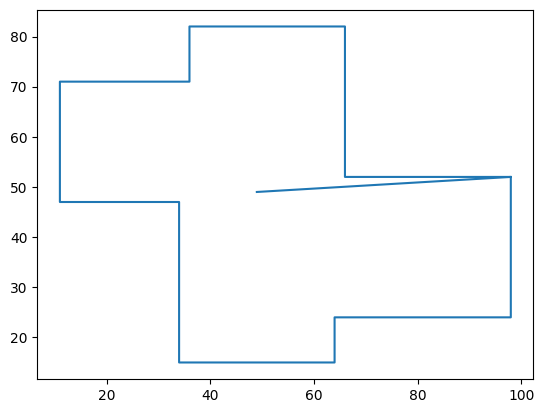

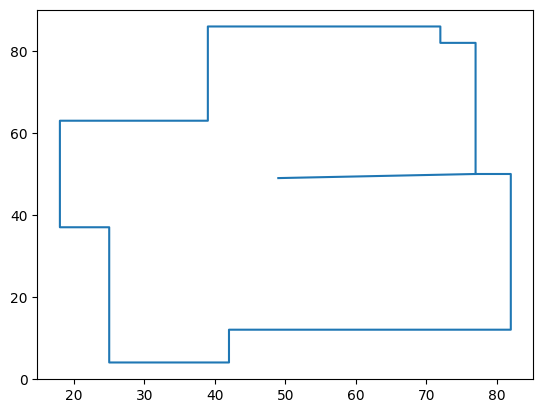

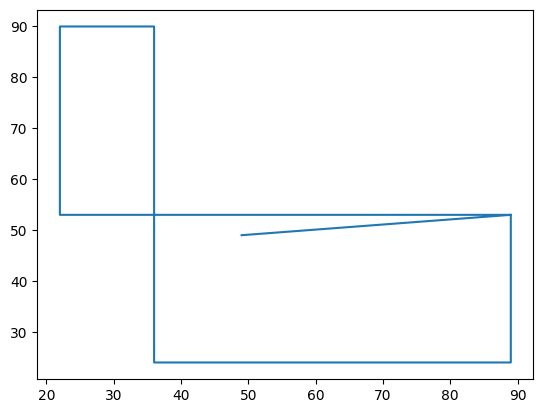

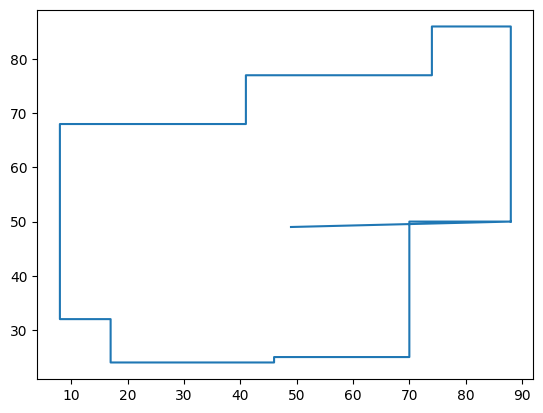

In [157]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
    if (x[:,-2:] == 49).all():
      break
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

In [158]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
import numpy as np
import matplotlib.pyplot as plt

dtype = torch.float32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.set_default_tensor_type(torch.cuda.FloatTensor)
to_nearest_64 = lambda x: round(x/64) * 64
model_scale = 1.
max_seq_len = 100

qk_dim_div = 8
expand_factor = 2
residual_depth = to_nearest_64(384 * math.log2(1.+model_scale))

num_blocks = round(8 * math.log2(1.+model_scale))
causal_mask = torch.triu(torch.ones(max_seq_len, max_seq_len), diagonal=1).bool()

with torch.no_grad():
  bias_range = torch.arange(-max_seq_len+1, 1).to(device, dtype)
  position_bias_base = bias_range.unsqueeze(0) - bias_range.unsqueeze(1)
  negative_infinity_matrix_base = torch.empty_like(position_bias_base).fill_(-float("inf"))
  causal_mask = torch.tril(torch.ones((max_seq_len, max_seq_len), device=device, dtype=torch.bool))

In [159]:
class LatentAttentionBlock(nn.Module):
  """ Efficient fused latent-space attention block. Linear keys and queries, nonlinear values."""
  def __init__(self, num_dim):
    super().__init__()

    self.dim        = num_dim
    self.qk_dim     = self.dim//qk_dim_div
    self.v_dim      = num_dim
    self.expand_dim = num_dim * expand_factor

    self.norm       = nn.LayerNorm(self.dim, bias=False)
    self.expand     = nn.Parameter(.5 * 1./residual_depth**.5 * 1./expand_factor * torch.randn(2*self.qk_dim+2*self.expand_dim, self.dim))
    self.project    = nn.Parameter(1. * 1./residual_depth**.5 * 1./expand_factor * 1./num_blocks * torch.randn((self.dim, self.expand_dim),dtype=dtype))
    self.position_bias_mult = nn.Parameter(torch.tensor(1.))

  def forward(self, x):
    
    residual = x
    attn_mask = torch.where(causal_mask[:x.shape[1], :x.shape[1]], F.softplus(self.position_bias_mult) * position_bias_base[:x.shape[1], :x.shape[1]], negative_infinity_matrix_base[:x.shape[1], :x.shape[1]])
    x = self.norm(x)
    query, key, linear, pre_gelu = F.linear(x, self.expand).split((self.qk_dim, self.qk_dim, self.expand_dim, self.expand_dim), dim=-1)
    geglu = linear * F.gelu(pre_gelu)
    geglu_local, geglu_attention_value = geglu.split((self.expand_dim-self.v_dim, self.v_dim), -1)
    attention = F.scaled_dot_product_attention(query, key, geglu_attention_value, attn_mask=attn_mask)
    out = F.linear(torch.cat([geglu_local, attention], dim=-1), self.project)
    x = residual + out
    return x
   
n_toks = 100

In [160]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    # self.xemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    # self.yemb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.emb = nn.Embedding(n_toks, residual_depth, scale_grad_by_freq=True)
    self.blocks = nn.ModuleList([LatentAttentionBlock(residual_depth) for _ in range(num_blocks)])
    self.norm = nn.LayerNorm(residual_depth, bias=False)
    self.out = nn.Linear(residual_depth, n_toks, bias=False)
  
  def forward(self, x:torch.Tensor):
    # x = x.reshape(len(x), -1, 2)
    # x = torch.cat([self.xemb(x[:,:,0]).unsqueeze(2), self.yemb(x[:,:,1]).unsqueeze(2)], dim=2)
    # x = x.reshape(len(x), -1, residual_depth)
    # x = x.reshape(len(x), -1, residual_depth)
    x = self.emb(x)
    x = self.norm(x)
    for block in self.blocks: x = block(x)
    x = self.norm(x)
    x = self.out(x)
    return x

net = Model().to(device, dtype).train()
opt = optim.Adam(net.parameters(), lr=3e-4)

In [161]:
def random_shape():
  n = np.random.randint(3, 10)
  corners = []
  for i in range(n):
    angle = 2*np.pi*i/n + np.random.rand()*0.1
    r = np.random.rand() * 0.5 + 0.5
    corners.append(torch.tensor([np.cos(angle)*r, np.sin(angle)*r],dtype=torch.float32))
  verts = []
  corner_dir = np.random.randint(2)
  for i in range(n + 1):
    verts.append(corners[i % n])
    verts.append(torch.tensor([corners[(i+corner_dir) % n][0] , corners[(i + 1 - corner_dir) % n][1]]))

  verts = torch.stack(verts[:-1])
  return verts

max_points = 19

def display(s):
  s = s[:2 * max_points]
  s = s.reshape(-1,2)
  plt.plot(s[:,0].cpu().numpy(), s[:,1].cpu().numpy())


def gen_data(n):
  shapes = [random_shape() for _ in range(n)]
  x = torch.stack([torch.cat([s, torch.zeros(max_points - len(s), 2)]) for s in shapes])

  x = x.view(n, -1)
  x = (x - x.min()) / (x.max() - x.min()) * (n_toks-1)
  x = x.long()
  pad = torch.zeros(n, 1).long()
  y = x
  x = torch.cat([pad, x], dim=1)[:, :-1]
  return x, y

x,y = gen_data(100)

In [162]:
def step(x,y):
  opt.zero_grad()
  out = net(x)
  loss = F.cross_entropy(out.reshape(-1, n_toks),y.flatten())
  loss.backward()
  opt.step()
  return loss

In [163]:
epochs = 1000
l = step(x,y)
print(l.item())
for _ in range(10):
  x,y = gen_data(100)
  for _ in range(epochs // 20):
    l = step(x,y)* 0.1 + l * 0.9
  print(l.item())

4.8920722007751465
1.8768155574798584
0.7876415252685547
0.33901751041412354
0.21922455728054047
0.1959017962217331
0.16755007207393646
0.16459625959396362
0.15928402543067932
0.15639981627464294
0.1518579125404358


******* INFERENCE ********


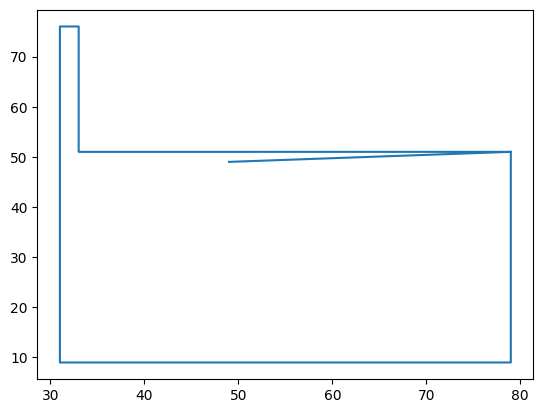

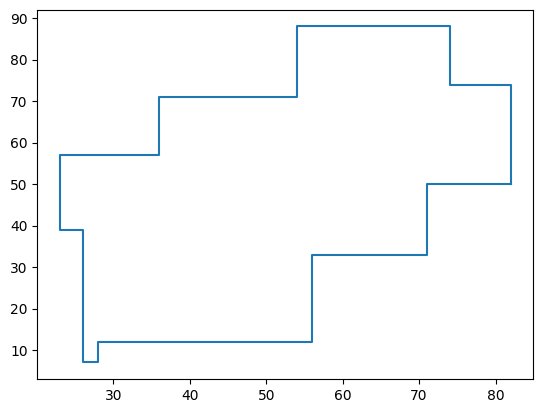

RuntimeError: shape '[-1, 2]' is invalid for input of size 31

In [164]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
    if (x[:,-2:] == 49).all():
      break
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

******* INFERENCE ********


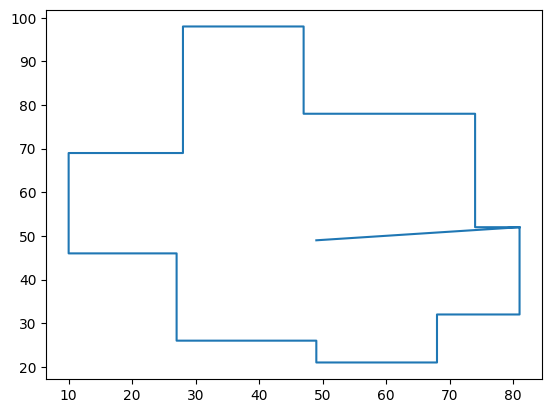

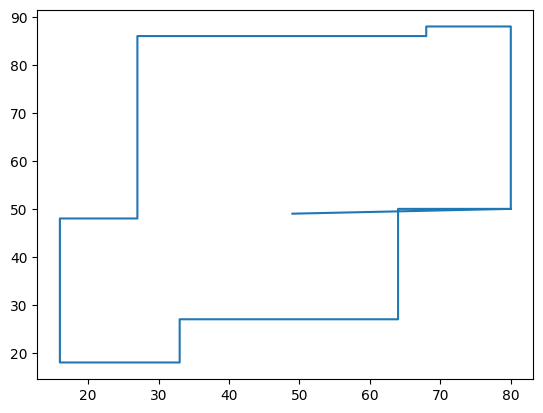

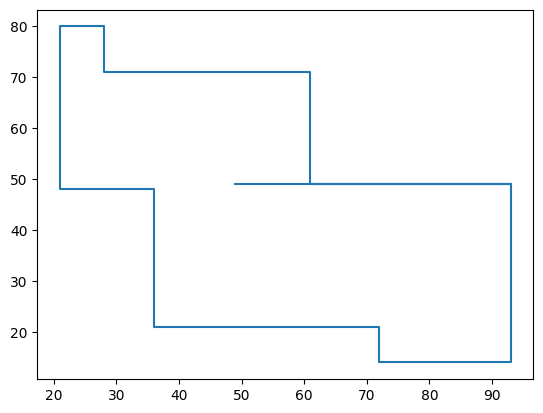

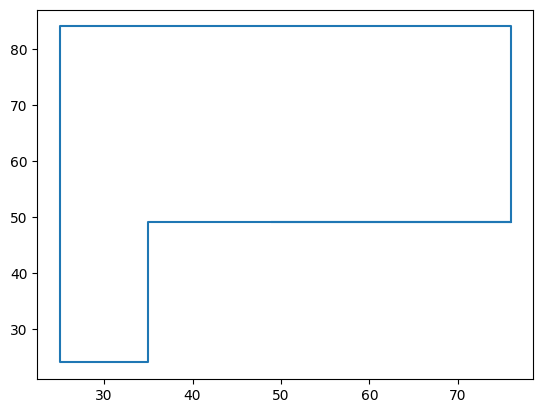

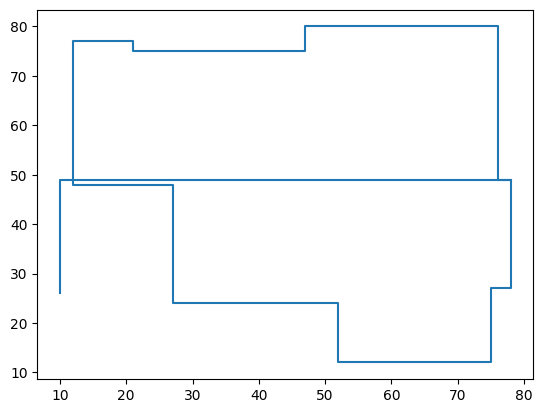

In [165]:
print ("******* INFERENCE ********")

def generate(n):
  x = torch.zeros(1, 1).long()
  for i in range(n):
    p = net(x[:,-99:])
    choices = p[0,-1,:]
    choice = torch.multinomial(choices.softmax(-1), 1)
    x = torch.cat([x, choice.reshape(1,1)], dim=1)
    # if (x[:,-2:] == 49).all(): break
  return x

for i in range(5):
  p = generate(max_points*2)
  plt.show()
  display(p[0,1:])

In [166]:
net

Model(
  (emb): Embedding(100, 384, scale_grad_by_freq=True)
  (blocks): ModuleList(
    (0-7): 8 x LatentAttentionBlock(
      (norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
    )
  )
  (norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
  (out): Linear(in_features=384, out_features=100, bias=False)
)

In [167]:
net.blocks[0]

LatentAttentionBlock(
  (norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
)

In [169]:
net.blocks[0].expand.shape

torch.Size([1632, 384])

In [170]:
net.blocks[0].project.shape

torch.Size([384, 768])